###  Installing / Loading in the required R packages

### Loading in data to begin the analysis (Making the phyloseq object)
Purpose: We need to make objects called phyloseq objects to work with.

In order to make a phyloseq object, we need to import certain files first.

We will need to import the biom table, a phylogenetic tree, and the resulting metadata

In [1]:
#This is the very crucial step to get right otherwise you will not be able to do further analysis or pretty much
#anything else

#Make sure phyloseq is correctly installed. Install through your conda R
#Make sure that all CC compilers are updated, especially if your OS was recently updated.
#If you get any errors that say CC compiler failed (or it says no) when it attempts to install any dependencies
#check the following link for how to update your Mac 
#https://stackoverflow.com/questions/52509602/cant-compile-c-program-on-a-mac-after-upgrade-to-mojave
#always make sure what versions of packages you are using 

library("phyloseq")
packageVersion("phyloseq")
#Package version of phyloseq is 1.26.0

library("ggplot2")
packageVersion("ggplot2")
#Package version of ggplot2 is 3.1.0

library("biomformat")
packageVersion("biomformat")
#Package version of biomformat is 1.10.0

library("vegan")
packageVersion('vegan')
#Package version of vegen is 2.5.3

library("grid")
packageVersion('grid')
#Package version of grid is 3.5.1

library(magrittr)
packageVersion('magrittr')
#Package version of magrittr is 1.5

library(dplyr)
packageVersion("dplyr")
#Package version of dplyr is 0.7.8

library(plyr)
packageVersion("plyr")
#Package version of plyr is 1.8.4

library(broom)
packageVersion("broom")
#Package version of broom is 0.5.1

library('stringr')
packageVersion("stringr")
#Package version of stringr is 1.3.1

library('sos')
packageVersion("sos")
#Package version of sos is 2.0.0
#this is for seeing which package a function belongs to

library("data.table")
packageVersion("data.table")
#Package version of data.table is 1.11.8

library(FSA)
packageVersion("FSA")
#Package version of FSA is 0.8.22

library(reshape2)
packageVersion("reshape2")
#Package version of reshape2 is 1.4.3

library(gridExtra)
packageVersion("gridExtra")
#Package version of gridExtra is 2.3




[1] ‘1.26.0’

[1] ‘3.1.0’

[1] ‘1.10.0’

Loading required package: permute
Loading required package: lattice
This is vegan 2.5-3


[1] ‘2.5.3’

[1] ‘3.5.1’

[1] ‘1.5’


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



[1] ‘0.7.8’

------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize



[1] ‘1.8.4’

[1] ‘0.5.1’

[1] ‘1.3.1’

Loading required package: brew

Attaching package: ‘sos’

The following object is masked from ‘package:dplyr’:

    matches

The following object is masked from ‘package:utils’:

    ?



[1] ‘2.0.0’


Attaching package: ‘data.table’

The following objects are masked from ‘package:dplyr’:

    between, first, last



[1] ‘1.11.8’

## FSA v0.8.22. See citation('FSA') if used in publication.
## Run fishR() for related website and fishR('IFAR') for related book.


[1] ‘0.8.22’


Attaching package: ‘reshape2’

The following objects are masked from ‘package:data.table’:

    dcast, melt



[1] ‘1.4.3’


Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine



[1] ‘2.3’

In [2]:
#First we will set some variables equal to these files, to make it easier for us to work with
#We will be working with the nonrarified version of the data first

#First defining the filepaths using the phyloseq package
    #Package in use: phyloseq
    #function: system.file 
#We have 4 filepaths in total:
    #One biom table that is not rarified
    #One biom table that has been rarified (5462 sequences per sample)
    #One phylogenetic tree
    #One representative sequence file (the rep_set.fasta)
main_biom_table_all_mice_all_weeks  = system.file("extdata", "output_from_6_OTU_filter_singletons/otu_table_no_singletons.biom",  package="phyloseq")
rarified_biom_table_all_mice_all_weeks = system.file("extdata", "output_from_7_OTU_rarified_5462/otu_table_rarified5462.biom", package="phyloseq")
tree_filename_all_mice_all_weeks = system.file("extdata", "output_from_4_OTU_clustering/rep_set.tre",  package="phyloseq")
#refseqfilename = system.file("extdata", "output_from_4_OTU_clustering/rep_set/filtered_sequences_rep_set.fasta",  package="phyloseq")

#--------------------------------------------------------------------------------------------------------------------#
#Title: Creating the phyloseq object 
#function: import_biom
    #Purpose: The purpose of this function is to take Biom-format files and import it as phyloseq data
    #Variables:
        #BIOMfilename is the biom formatted file (.biom)
        #treefilename (opt) is the tree that we want to use
        #refseqfilename (opt) is the representative sequences of the OTUs
        #parseFunction = parse_taxonomy_greengenes

biom_data_allmice_allweeks <- import_biom(BIOMfilename = "output_from_6_OTU_filter_singletons/otu_table_no_singletons.biom"
            ,treefilename = "output_from_4_OTU_clustering/rep_set.tre"
            #, refseqfilename = "output_from_4_OTU_clustering/rep_set/filtered_sequences_rep_set.fasta"
            )




Warning message in strsplit(conditionMessage(e), "\n"):
“input string 1 is invalid in this locale”

In [3]:
biom_table_right_after_quality_filteirng  = system.file("extdata", "output_from_4_OTU_clustering/otu_table.biom",  package="phyloseq")


In [4]:
#--------------------------------------------------------------------------------------------------------------------#
#Title: Creating the phyloseq object PART 2: The mapping file
#function: import_qiime_sample_data
    #Purpose: this is for importing in the mapping file. It will be named as mapping_file_allmice_allweeks
mapping_file_allmice_allweeks <- import_qiime_sample_data(mapfilename = "all_mapping_and_filtering_files/exp12_metadata_Q1_V3.tsv")


#--------------------------------------------------------------------------------------------------------------------#
#Title: Merging the OTU and mapping data into a phyloseq object
#Purpose: In order to make the phyloseq object we need to merge the OTU and the mapping data into a single 
    #Phyloseq object
#Function: merge_phyloseq
    #Purpose: This merges the mapping file and OTU together
phylo_allmice_allweeks <- merge_phyloseq(biom_data_allmice_allweeks,mapping_file_allmice_allweeks )

#--------------------------------------------------------------------------------------------------------------------#
#Title: Adding in names to the Biom table and checking the phyloseq objects
#Function: tax_table
    #Purpose: This is for building and accessing the taxonomy table
        #This the suggested method for constructing and accessing a table of taxonomic names, 
        #organized with ranks as columns.
colnames(tax_table(phylo_allmice_allweeks))= c("Kingdom","Phylum","Class","Order","Family","Genus","Species")
#Function: rank_names
    #Purpose: This is just for retrieving the names of the taxonomic ranks
rank_names(phylo_allmice_allweeks)


[1] "Kingdom" "Phylum"  "Class"   "Order"   "Family"  "Genus"   "Species"

In [5]:
#--------------------------------------------------------------------------------------------------------------------#
#Title: Listing very basic information about the phyloseq object

#Function: nsamples()
    #Purpose: literally just says the number of samples
print ('Number of Samples in our Biom Table')
nsamples(phylo_allmice_allweeks)

#Function: ntaxa()
    #Purpose: It justs lists the number of unique OTUs there are 
print ('Number of OTUs we have.')
ntaxa(phylo_allmice_allweeks)

#Function: sample_sums()
    #Purpose: it just shows very basic summary statistics of the sampling depth (sequences per sample)
print ('Sequencing depth.')
depths <- sample_sums(phylo_allmice_allweeks)
summary(depths)

#Function: sort
    #Purpose: it simply sorts the phyloseq object. We want to use this to find the sample with the lowest sequences
print("Sample with the lowest amount of sequences")
head(sort(sample_sums(phylo_allmice_allweeks)),1)

#Function: subset_samples
    #Purpose: If you want to remove a sample from the phyloseq object

#phylo=subset_samples(phylo,Description!='51291')
#summary statistics of sampling depth
#print ('Sequencing depth.')
#depths <- sample_sums(phylo)
#summary(depths)
# look at  sample sum to make sure we got rid of the sample


[1] "Number of Samples in our Biom Table"


[1] 226

[1] "Number of OTUs we have."


[1] 1451

[1] "Sequencing depth."


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   5462   16233   17862   18058   19480   38294 

[1] "Sample with the lowest amount of sequences"


344.T12 
   5462

### Looking at big picture stuff first, only alpha and beta diversity

In [6]:
#--------------------------------------------------------------------------------------------------------------------#
#Title: Rarify phyloseq object data
#Purpose: We need to rarify our dataset so we have an even depth

#Function: set.seed
    #Purpose: used for random number generator. We set a number in it to set the seed. This is useful for setting
    #the same random numbers repeatedly
#Function: rarefy_even_depth()
    #Purpose: rarifying our data so that we use an even sampling depth.
set.seed(123) #Setting the seed number as 123
for (i in 1:100) {
  phylo_allmice_allweeks_rarified <- rarefy_even_depth(phylo_allmice_allweeks, 
                                                       sample.size = 5400, 
                                                       verbose = FALSE, 
                                                       replace = TRUE)
}

#--------------------------------------------------------------------------------------------------------------------#
#Title: Rarify phyloseq object data
#Purpose: We need to rarify our dataset so we have an even depth

#Function: set.seed
    #Purpose: used for random number generator. We set a number in it to set the seed. This is useful for setting
    #the same random numbers repeatedly
#Function: rarefy_even_depth()
    #Purpose: rarifying our data so that we use an even sampling depth of 
set.seed(123) #Setting the seed number as 123
for (i in 1:100) {
  phylo_allmice_allweeks_rarified_3640 <- rarefy_even_depth(phylo_allmice_allweeks, 
                                                       sample.size = 3640, 
                                                       verbose = FALSE, 
                                                       replace = TRUE)
}


### Creating subsamples of the main phyloseq

In [7]:
#At this point we need to subset samples in order to do all of the analysis that we want to do!
#Here is a link for more information: https://joey711.github.io/phyloseq/preprocess.html
print("This is the original phyloseq object, this has all mice and all weeks")
print("phylo_allmice_allweeks_rarified")
phylo_allmice_allweeks_rarified

#Things to note:
    #In total there are 226 samples 
    #2 controls, 112 placebos, 112 letrozoles
    #there are 16 mice total (8 placebo and 8 letrozole) and 14 weeks total (weeks 0 to 13)

#Creating a placebo only subset
phylo_only_placebo_allweeks_rarified <- subset_samples(phylo_allmice_allweeks_rarified, Treatment =="Placebo")
print("phylo_only_placebo_allweeks_rarified") #8 placebo times 14 = 112
print("#8 placebo times 14 = 112")
phylo_only_placebo_allweeks_rarified

#Creating a letrozole only subset
phylo_only_letrozole_allweeks_rarified <- subset_samples(phylo_allmice_allweeks_rarified, Treatment =="Letrozole")
print("phylo_only_letrozole_allweeks_rarified") #8 letrozole times 14 = 112
print("#8 letrozole times 14 = 112")
phylo_only_letrozole_allweeks_rarified

#Merging the placebo and letrozole only subsets (AKA there will not be any controls)
phylo_placebo_and_letrozole_allweeks_rarified <- merge_phyloseq(phylo_only_placebo_allweeks_rarified, #Placebo
                                                                phylo_only_letrozole_allweeks_rarified) #Letrozole
print("phylo_placebo_and_letrozole_allweeks_rarified") #112 placebo and 112 letrozole = 224
print("#112 placebo and 112 letrozole = 224")
phylo_placebo_and_letrozole_allweeks_rarified

#Creating an all week subset (except time point 0)
phylo_placebo_and_letrozole_allweeks_except0_rarified <-subset_samples(phylo_placebo_and_letrozole_allweeks_rarified,
                                                                      time_point >0)
print("phylo_placebo_and_letrozole_allweeks_except0_rarified")
print("#16 mice times 13 = 208")
phylo_placebo_and_letrozole_allweeks_except0_rarified

#Creating a pre only subset (Weeks 0 through 5)
phylo_pre_weeks012345_rarified <- subset_samples(phylo_placebo_and_letrozole_allweeks_rarified, Pre_or_Post =="Pre")
print("phylo_pre_weeks012345_rarified") #"16 mice times 6 timepoints = 96"
print("16 mice times 6 timepoints = 96") 
phylo_pre_weeks012345_rarified

#Creating a post only subset (Weeks 6 through 13)
phylo_post_weeks678910111213_rarified <- subset_samples(phylo_placebo_and_letrozole_allweeks_rarified, Pre_or_Post =="Post")
print("phylo_post_weeks678910111213_rarified") #16 mice times 8 = 128
print("16 mice times 8 = 128") 
phylo_post_weeks678910111213_rarified

#Creating a pre only subset, last 5 weeks (Weeks 1 through 5)
phylo_pre_last5weeks_rarified <- subset_samples(phylo_pre_weeks012345_rarified, time_point > 0)
print("phylo_pre_last5weeks_rarified") #16 mice times 5 = 80
print("16 mice times 5 = 80") 
phylo_pre_last5weeks_rarified

#Creating a post only subset, last 5 weeks (Weeks 9 through 13)
phylo_post_last5weeks_rarified <- subset_samples(phylo_post_weeks678910111213_rarified, time_point > 8)
print("phylo_post_last5weeks_rarified") #16 mice times 5 = 80
print("16 mice times 5 = 80") 
phylo_post_last5weeks_rarified

#Creating a pre only subset, last 3 weeks (Weeks 3 through 5)
phylo_pre_last3weeks_rarified <- subset_samples(phylo_pre_weeks012345_rarified, time_point > 2)
print("phylo_pre_last3weeks_rarified") #16 mice times 3 = 48
print("16 mice times 3 = 48") 
phylo_pre_last3weeks_rarified

#Creating a Post only subset, last 3 weeks (Weeks 11 through 13)
phylo_post_last3weeks_rarified <- subset_samples(phylo_post_weeks678910111213_rarified, time_point > 10)
print("phylo_post_last3weeks_rarified") #16 mice times 3 = 48
print("16 mice times 3 = 48") 
phylo_post_last3weeks_rarified



#--------------------------------------------------------------------------------------------------------------------#
#Functions:

#merge_phyloseq()
    #Function is used for merging different phyloseq object together. Input is a list
#subset_samples()
    #Function is used for subsetting samples (example is getting only placebo or letrozole mice)
    #(phyloseq_object that you want to subset from, "Name of column" == "Variable you want to keep")


[1] "This is the original phyloseq object, this has all mice and all weeks"
[1] "phylo_allmice_allweeks_rarified"


phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1451 taxa and 226 samples ]
sample_data() Sample Data:       [ 226 samples by 19 sample variables ]
tax_table()   Taxonomy Table:    [ 1451 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 1451 tips and 1450 internal nodes ]

[1] "phylo_only_placebo_allweeks_rarified"
[1] "#8 placebo times 14 = 112"


phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1451 taxa and 112 samples ]
sample_data() Sample Data:       [ 112 samples by 19 sample variables ]
tax_table()   Taxonomy Table:    [ 1451 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 1451 tips and 1450 internal nodes ]

[1] "phylo_only_letrozole_allweeks_rarified"
[1] "#8 letrozole times 14 = 112"


phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1451 taxa and 112 samples ]
sample_data() Sample Data:       [ 112 samples by 19 sample variables ]
tax_table()   Taxonomy Table:    [ 1451 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 1451 tips and 1450 internal nodes ]

[1] "phylo_placebo_and_letrozole_allweeks_rarified"
[1] "#112 placebo and 112 letrozole = 224"


phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1451 taxa and 224 samples ]
sample_data() Sample Data:       [ 224 samples by 19 sample variables ]
tax_table()   Taxonomy Table:    [ 1451 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 1451 tips and 1450 internal nodes ]

[1] "phylo_placebo_and_letrozole_allweeks_except0_rarified"
[1] "#16 mice times 13 = 208"


phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1451 taxa and 208 samples ]
sample_data() Sample Data:       [ 208 samples by 19 sample variables ]
tax_table()   Taxonomy Table:    [ 1451 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 1451 tips and 1450 internal nodes ]

[1] "phylo_pre_weeks012345_rarified"
[1] "16 mice times 6 timepoints = 96"


phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1451 taxa and 96 samples ]
sample_data() Sample Data:       [ 96 samples by 19 sample variables ]
tax_table()   Taxonomy Table:    [ 1451 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 1451 tips and 1450 internal nodes ]

[1] "phylo_post_weeks678910111213_rarified"
[1] "16 mice times 8 = 128"


phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1451 taxa and 128 samples ]
sample_data() Sample Data:       [ 128 samples by 19 sample variables ]
tax_table()   Taxonomy Table:    [ 1451 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 1451 tips and 1450 internal nodes ]

[1] "phylo_pre_last5weeks_rarified"
[1] "16 mice times 5 = 80"


phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1451 taxa and 80 samples ]
sample_data() Sample Data:       [ 80 samples by 19 sample variables ]
tax_table()   Taxonomy Table:    [ 1451 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 1451 tips and 1450 internal nodes ]

[1] "phylo_post_last5weeks_rarified"
[1] "16 mice times 5 = 80"


phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1451 taxa and 80 samples ]
sample_data() Sample Data:       [ 80 samples by 19 sample variables ]
tax_table()   Taxonomy Table:    [ 1451 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 1451 tips and 1450 internal nodes ]

[1] "phylo_pre_last3weeks_rarified"
[1] "16 mice times 3 = 48"


phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1451 taxa and 48 samples ]
sample_data() Sample Data:       [ 48 samples by 19 sample variables ]
tax_table()   Taxonomy Table:    [ 1451 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 1451 tips and 1450 internal nodes ]

[1] "phylo_post_last3weeks_rarified"
[1] "16 mice times 3 = 48"


phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1451 taxa and 48 samples ]
sample_data() Sample Data:       [ 48 samples by 19 sample variables ]
tax_table()   Taxonomy Table:    [ 1451 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 1451 tips and 1450 internal nodes ]

### Alpha diversity (Microbial richness)¶


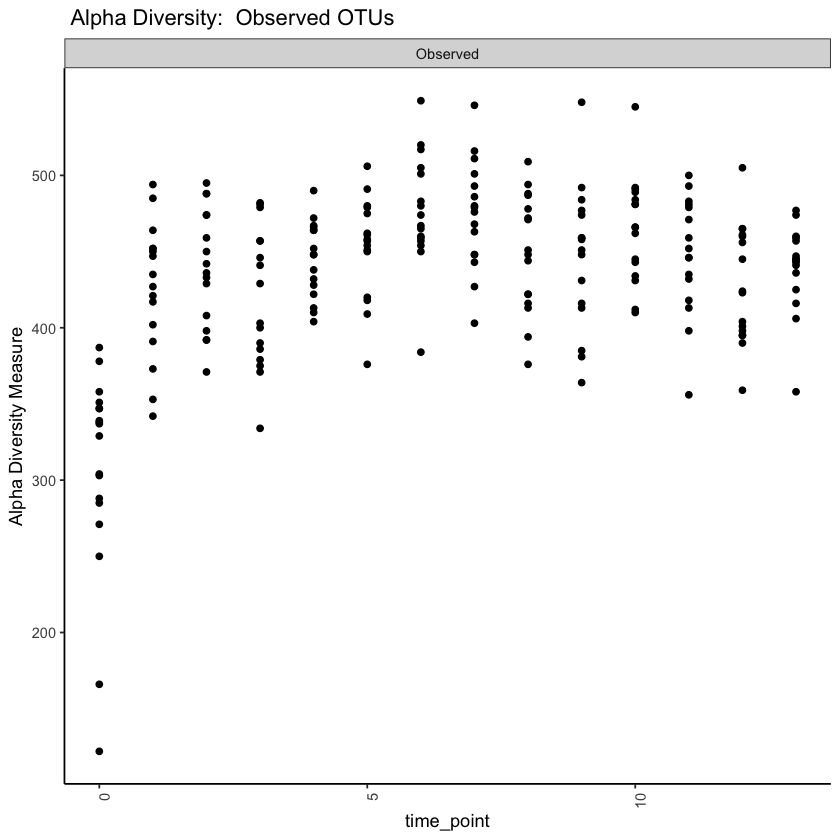

In [8]:
#--------------------------------------------------------------------------------------------------------------------#
#Title: Alpha Diversity - Shannon's 
    #Shannon's looks at species richness
#Function: plot_richness
    #Purpose: This function is literally for alpha diversity analysis
    #This function is not just for species richness (OTUs), you can do shannon's or other alpha metrics
    #For the alpha metrics you can do the following:
        #c("Observed", "Chao1", "ACE", "Shannon", "Simpson", "InvSimpson", "Fisher")
alpha_diverisity_plot_observed = plot_richness(phylo_allmice_allweeks_rarified, 
                                              x ="time_point" , #Setting x as the weeks (0 to 13)
                                              measures=c("Observed")) #We will be measuring 
a <- alpha_diverisity_plot_observed + 
    ggtitle(' Alpha Diversity:  Observed OTUs') + #Name of plot
    theme_bw() + #Black and white theme
    theme(panel.border = element_blank(), panel.grid.major = element_blank(), #This will remove all panels
          panel.grid.minor = element_blank(), axis.line = element_line(colour = "black")) +
    theme(axis.text.x = element_text(angle = 90, hjust = 1))
a




In [9]:
#data_table_alpha_diverisity_plot_observed_only_placebo <- data_table_alpha_diverisity_plot_observed[(Treatment == "Placebo")]
#data_table_alpha_diverisity_plot_observed_only_placebo



In [10]:
#--------------------------------------------------------------------------------------------------------------------#
#Title: First attempt at a ANOVA between the groups (Placebo and Letrozole)
#Conditions:
    #This is using the phyloseq object created from rep_set.tre, mapping file V3, the non-rarified biom file
    #This phyloseq object was then rarified at 5400 sequences/ sample for equal sampling depth.
#Function: data.table
    #It is an enhanced data frame, it offers fast subsets
data_table_alpha_diverisity_plot_observed = data.table(alpha_diverisity_plot_observed$data)

# At this point, now we will subset this newly formed data table to just the Observed OTUs
data_table_alpha_diverisity_plot_observed_only <- data_table_alpha_diverisity_plot_observed[(variable == "Observed")]

#At this point, we will now perform a kruskal wallis test followed by a dunn's tests for Observed OTUs per group (P/L)
#kruskal wallis test is a non-parametric one way anova
#dunn's tests is the non-parametric pairwise multiple comparisons procedure based on rank sums
print('Kruskall wallis folllowed by dunns for Observed OTUs per group')
dunnTest(rank(value) ~ Treatment,
              data=data_table_alpha_diverisity_plot_observed_only,
              method="bh") 


[1] "Kruskall wallis folllowed by dunns for Observed OTUs per group"


Dunn (1964) Kruskal-Wallis multiple comparison
  p-values adjusted with the Benjamini-Hochberg method.



                        Comparison           Z    P.unadj     P.adj
1   Extraction control - Letrozole -1.72374011 0.08475477 0.2542643
2 Extraction control - PCR control  0.01081526 0.99137084 0.9913708
3          Letrozole - PCR control  1.73896738 0.08204050 0.4922430
4     Extraction control - Placebo -1.70239475 0.08868139 0.1330221
5              Letrozole - Placebo  0.16044559 0.87253008 1.0000000
6            PCR control - Placebo -1.71762202 0.08586558 0.1717312

In [11]:
#--------------------------------------------------------------------------------------------------------------------#
#Looking at data but this is time series data perhaps we should look at this in a linear regression form
# We will return a list
summary(data_table_alpha_diverisity_plot_observed_only$Treatment)       
        
models <- dlply(data_table_alpha_diverisity_plot_observed_only, "Treatment", function(df) # the Name can be changed to whatever category you are interested in
lm(rank(value) ~ time_point , data = df))

# Print the summary of each model
cbind(
  state = attr(models, "split_labels"),
  bind_rows(lapply(models, function(x) cbind(
    intercept = tidy(x)$estimate[1],
    beta = tidy(x)$estimate[2],
    glance(x))))
)

            

Extraction control          Letrozole        PCR control            Placebo 
                 1                112                  1                112

Treatment          intercept beta     r.squared  adj.r.squared sigma   
1 Extraction control  1.00000        NA 0.00000000 0.00000000         NaN
2 Letrozole          43.18036  2.049176 0.06529483 0.05679751    31.53672
3 PCR control         1.00000        NA 0.00000000 0.00000000         NaN
4 Placebo            44.82500  1.796154 0.05016491 0.04153004    31.79120
  statistic p.value    df logLik    AIC      BIC      deviance df.residual
1       NA          NA 1        Inf     -Inf     -Inf      0.0   0        
2 7.684168  0.00654360 2  -544.4412 1094.882 1103.038 109402.1 110        
3       NA          NA 1        Inf     -Inf     -Inf      0.0   0        
4 5.809577  0.01759737 2  -545.3413 1096.683 1104.838 111174.9 110

### Beta diversity ( microbial composition)

In [12]:
#--------------------------------------------------------------------------------------------------------------------#
#Title: calculating the beta diversity distances
#Refer to this page for more info: https://joey711.github.io/phyloseq/distance.html

#Things to note:
    #In the original phyloseq object there are 226 samples 
    #2 controls, 112 placebos, 112 letrozoles
    #there are 16 mice total (8 placebo and 8 letrozole) and 14 weeks total (weeks 0 to 13)
    #For the last three weeks there are: 16 mice times 3 = 48 samples total
    #Pre last 3 weeks has 48 samples
    #Post last 3 weeks has 48 samples

#--------------------------------------------------------------------------------------------------------------------#

#For pre time point (Last three weeks)
set.seed(123)
beta_div_distance1_braycurtis_pre_last3weeks_rarified = distance(phylo_pre_last3weeks_rarified, method = "bray") #For bray curtis dissimalarity
set.seed(123)
beta_div_distance1_unweightedunifrac_pre_last3weeks_rarified = distance(phylo_pre_last3weeks_rarified, method = "unifrac", weighted=FALSE) #Unweighted unifrac
set.seed(123)
beta_div_distance1_weightedunifrac_pre_last3weeks_rarified = distance(phylo_pre_last3weeks_rarified, method = "wunifrac") #Weighted unifrac

#For post time point (Last three weeks)
set.seed(123)
beta_div_distance1_braycurtis_post_last3weeks_rarified = distance(phylo_post_last3weeks_rarified, method = "bray") #For bray curtis dissimalarity
set.seed(123)
beta_div_distance1_unweightedunifrac_post_last3weeks_rarified = distance(phylo_post_last3weeks_rarified, method = "unifrac", weighted=FALSE) #Unweighted unifrac
set.seed(123)
beta_div_distance1_weightedunifrac_post_last3weeks_rarified = distance(phylo_post_last3weeks_rarified, method = "wunifrac") #Weighted unifrac

#--------------------------------------------------------------------------------------------------------------------#
#For pre time point (Last five weeks)
set.seed(123)
beta_div_distance1_braycurtis_pre_last5weeks_rarified = distance(phylo_pre_last5weeks_rarified, method = "bray") #For bray curtis dissimalarity
set.seed(123)
beta_div_distance1_unweightedunifrac_pre_last5weeks_rarified = distance(phylo_pre_last5weeks_rarified, method = "unifrac", weighted=FALSE) #Unweighted unifrac
set.seed(123)
beta_div_distance1_weightedunifrac_pre_last5weeks_rarified = distance(phylo_pre_last5weeks_rarified, method = "wunifrac") #Weighted unifrac

#For post time point (Last five weeks)
set.seed(123)
beta_div_distance1_braycurtis_post_last5weeks_rarified = distance(phylo_post_last5weeks_rarified, method = "bray") #For bray curtis dissimalarity
set.seed(123)
beta_div_distance1_unweightedunifrac_post_last5weeks_rarified = distance(phylo_post_last5weeks_rarified, method = "unifrac", weighted=FALSE) #Unweighted unifrac
set.seed(123)
beta_div_distance1_weightedunifrac_post_last5weeks_rarified = distance(phylo_post_last5weeks_rarified, method = "wunifrac") #Weighted unifrac

#--------------------------------------------------------------------------------------------------------------------#
#For pre time point (all weeks 0-5)
set.seed(123)
beta_div_distance1_braycurtis_pre_weeks012345_rarified = distance(phylo_pre_weeks012345_rarified, method = "bray") #For bray curtis dissimalarity
set.seed(123)
beta_div_distance1_unweightedunifrac_pre_weeks012345_rarified = distance(phylo_pre_weeks012345_rarified, method = "unifrac", weighted=FALSE) #Unweighted unifrac
set.seed(123)
beta_div_distance1_weightedunifrac_pre_weeks012345_rarified = distance(phylo_pre_weeks012345_rarified, method = "wunifrac") #Weighted unifrac

#For post time point (all weeks 6-13)
set.seed(123)
beta_div_distance1_braycurtis_post_weeks678910111213_rarified = distance(phylo_post_weeks678910111213_rarified, method = "bray") #For bray curtis dissimalarity
set.seed(123)
beta_div_distance1_unweightedunifrac_post_weeks678910111213_rarified = distance(phylo_post_weeks678910111213_rarified, method = "unifrac", weighted=FALSE) #Unweighted unifrac
set.seed(123)
beta_div_distance1_weightedunifrac_post_weeks678910111213_rarified = distance(phylo_post_weeks678910111213_rarified, method = "wunifrac") #Weighted unifrac

#--------------------------------------------------------------------------------------------------------------------#
#For all time points
set.seed(123)
beta_div_distance1_braycurtis_placebo_and_letrozole_allweeks_rarified = distance(phylo_placebo_and_letrozole_allweeks_rarified, method = "bray") #For bray curtis dissimalarity
set.seed(123)
beta_div_distance1_unweightedunifrac_placebo_and_letrozole_allweeks_rarified = distance(phylo_placebo_and_letrozole_allweeks_rarified, method = "unifrac", weighted=FALSE) #Unweighted unifrac
set.seed(123)
beta_div_distance1_weightedunifrac_placebo_and_letrozole_allweeks_rarified = distance(phylo_placebo_and_letrozole_allweeks_rarified, method = "wunifrac") #Weighted unifrac

#--------------------------------------------------------------------------------------------------------------------#
#For all time points except time 0
set.seed(123)
beta_div_distance1_braycurtis_placebo_and_letrozole_allweeks_except0_rarified = distance(phylo_placebo_and_letrozole_allweeks_except0_rarified, method = "bray") #For bray curtis dissimalarity
set.seed(123)
beta_div_distance1_unweightedunifrac_placebo_and_letrozole_allweeks_except0_rarified = distance(phylo_placebo_and_letrozole_allweeks_except0_rarified, method = "unifrac", weighted=FALSE) #Unweighted unifrac
set.seed(123)
beta_div_distance1_weightedunifrac_placebo_and_letrozole_allweeks_except0_rarified = distance(phylo_placebo_and_letrozole_allweeks_except0_rarified, method = "wunifrac") #Weighted unifrac

#--------------------------------------------------------------------------------------------------------------------#



#Functions:
#distance()
    #Input is the phyloseq object and the distance (Unifrac, bray curtis)
    #returns a dist-class distance object
    #can use this new onject for certain ordination methods (PCOA plots and such)


In [13]:
#--------------------------------------------------------------------------------------------------------------------#
#Title: ordination (AKA the multivariate visual analysis)
#refer to this page for more info: https://joey711.github.io/phyloseq/plot_ordination-examples.html

#For pre time point (Last three weeks)
beta_div_ordination2_braycurtis_pre_last3weeks_rarified = ordinate(phylo_pre_last3weeks_rarified, 
                                                                   method = "PCoA", 
                                                                   distance = beta_div_distance1_braycurtis_pre_last3weeks_rarified) #Bray curtis
beta_div_ordination2_unweightedunifrac_pre_last3weeks_rarified = ordinate(phylo_pre_last3weeks_rarified, 
                                                                          method = "PCoA", 
                                                                          distance = beta_div_distance1_unweightedunifrac_pre_last3weeks_rarified) #Unweighted unifrac
beta_div_ordination2_weightedunifrac_pre_last3weeks_rarified = ordinate(phylo_pre_last3weeks_rarified, 
                                                                        method = "PCoA", 
                                                                        distance = beta_div_distance1_weightedunifrac_pre_last3weeks_rarified) #Weighted unifrac
#For Post time point (Last three weeks)
beta_div_ordination2_braycurtis_post_last3weeks_rarified = ordinate(phylo_post_last3weeks_rarified, 
                                                                   method = "PCoA", 
                                                                   distance = beta_div_distance1_braycurtis_post_last3weeks_rarified) #Bray curtis
beta_div_ordination2_unweightedunifrac_post_last3weeks_rarified = ordinate(phylo_post_last3weeks_rarified, 
                                                                          method = "PCoA", 
                                                                          distance = beta_div_distance1_unweightedunifrac_post_last3weeks_rarified) #Unweighted unifrac
beta_div_ordination2_weightedunifrac_post_last3weeks_rarified = ordinate(phylo_post_last3weeks_rarified, 
                                                                        method = "PCoA", 
                                                                        distance = beta_div_distance1_weightedunifrac_post_last3weeks_rarified) #Weighted unifrac

#--------------------------------------------------------------------------------------------------------------------#
#For pre time point (Last five weeks)
beta_div_ordination2_braycurtis_pre_last5weeks_rarified = ordinate(phylo_pre_last5weeks_rarified, 
                                                                   method = "PCoA", 
                                                                   distance = beta_div_distance1_braycurtis_pre_last5weeks_rarified) #Bray curtis
beta_div_ordination2_unweightedunifrac_pre_last5weeks_rarified = ordinate(phylo_pre_last5weeks_rarified, 
                                                                          method = "PCoA", 
                                                                          distance = beta_div_distance1_unweightedunifrac_pre_last5weeks_rarified) #Unweighted unifrac
beta_div_ordination2_weightedunifrac_pre_last5weeks_rarified = ordinate(phylo_pre_last5weeks_rarified, 
                                                                        method = "PCoA", 
                                                                        distance = beta_div_distance1_weightedunifrac_pre_last5weeks_rarified) #Weighted unifrac
#For Post time point (Last five weeks)
beta_div_ordination2_braycurtis_post_last5weeks_rarified = ordinate(phylo_post_last5weeks_rarified, 
                                                                   method = "PCoA", 
                                                                   distance = beta_div_distance1_braycurtis_post_last5weeks_rarified) #Bray curtis
beta_div_ordination2_unweightedunifrac_post_last5weeks_rarified = ordinate(phylo_post_last5weeks_rarified, 
                                                                          method = "PCoA", 
                                                                          distance = beta_div_distance1_unweightedunifrac_post_last5weeks_rarified) #Unweighted unifrac
beta_div_ordination2_weightedunifrac_post_last5weeks_rarified = ordinate(phylo_post_last5weeks_rarified, 
                                                                        method = "PCoA", 
                                                                        distance = beta_div_distance1_weightedunifrac_post_last5weeks_rarified) #Weighted unifrac


#--------------------------------------------------------------------------------------------------------------------#

#Functions:
#ordinate()
    #Method is the type of ordination method you want to apply (PCoA, PCA, etc.)
    #Distance is the distance object that you want to use 
   


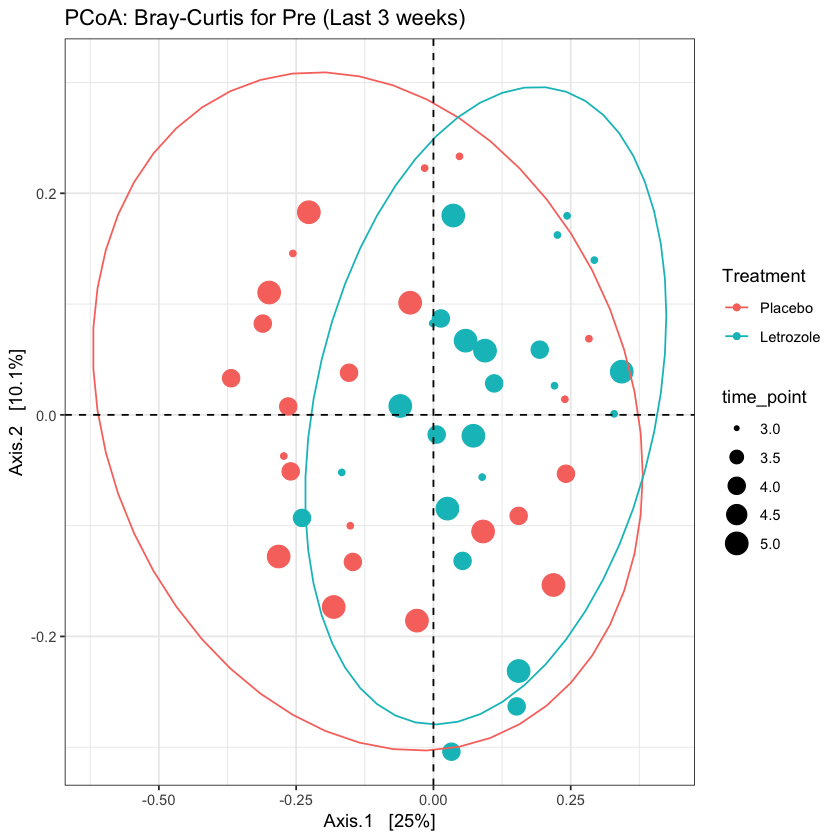

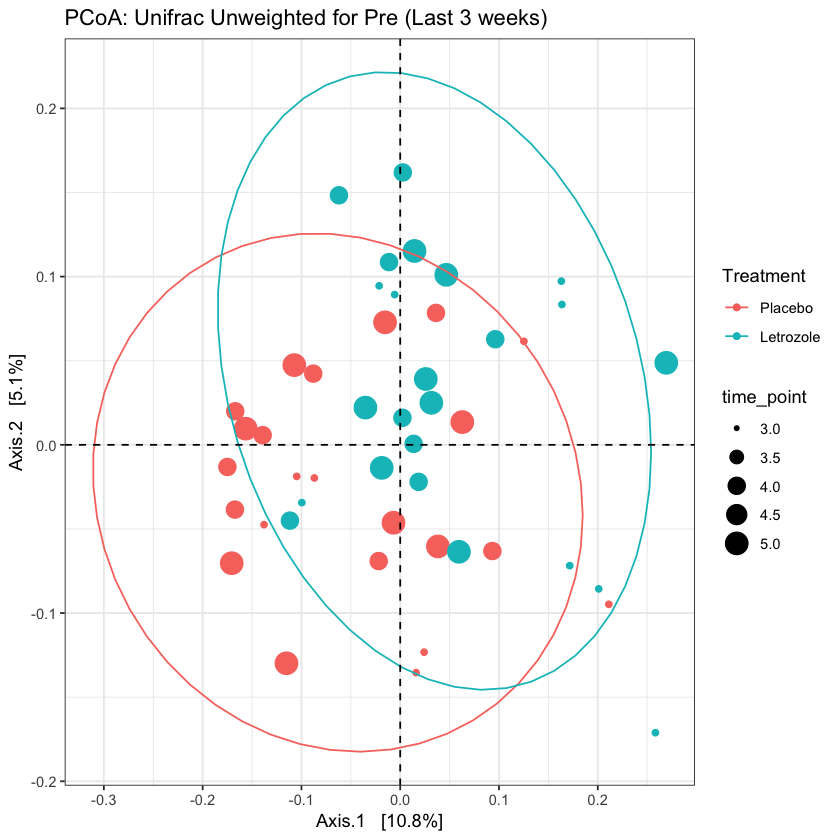

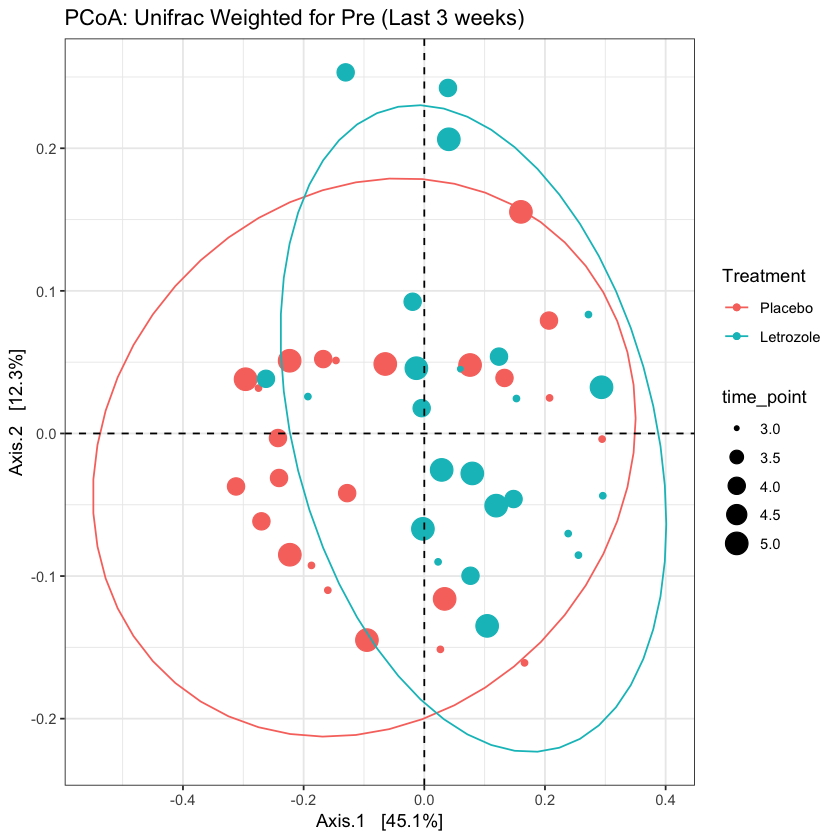

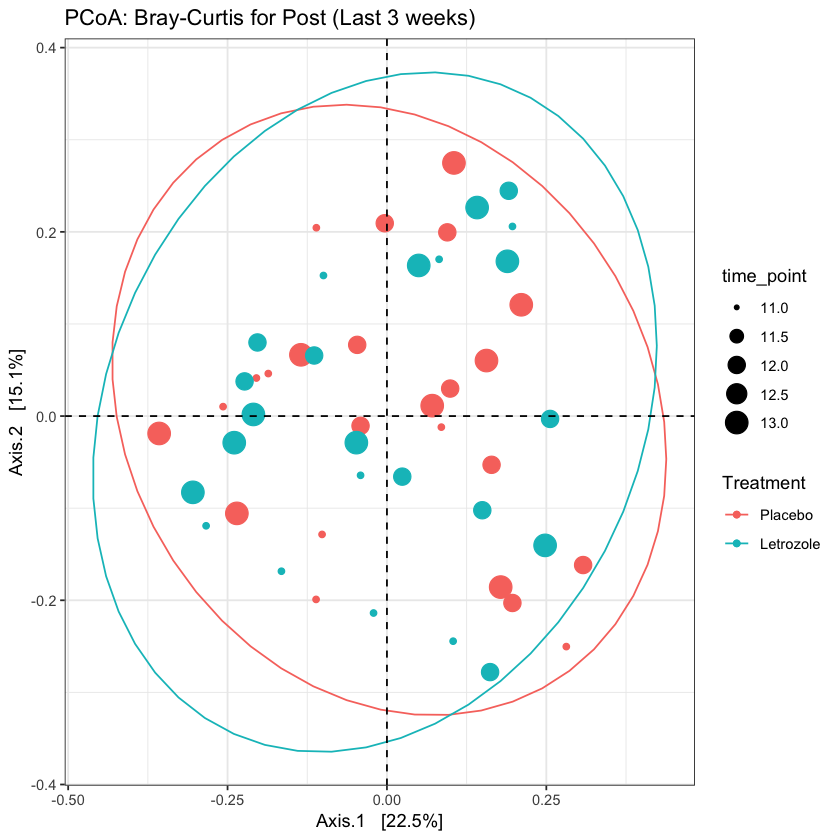

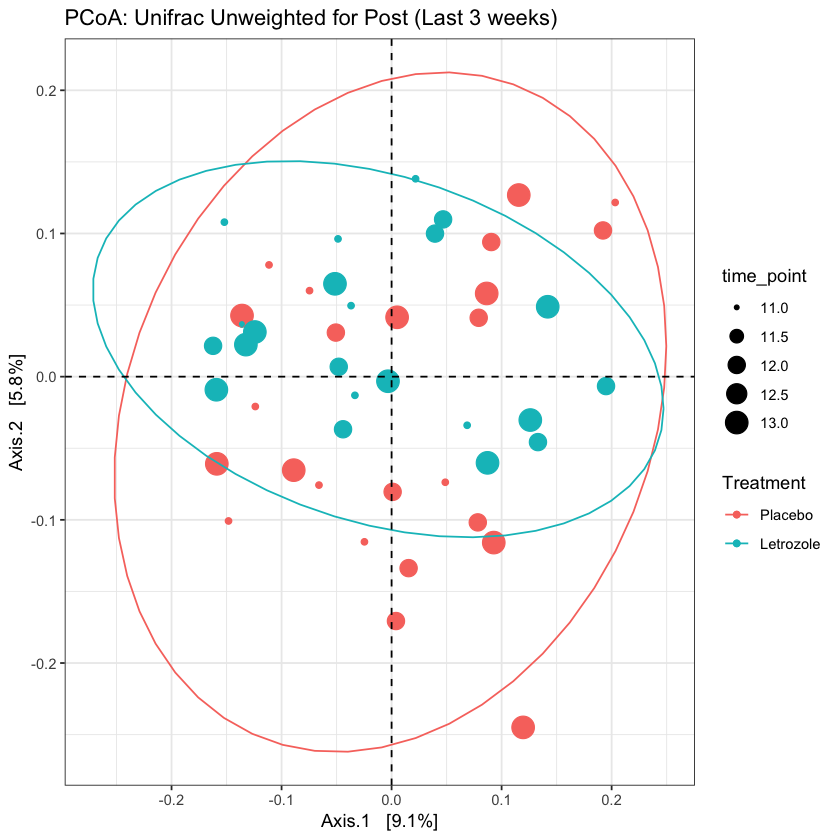

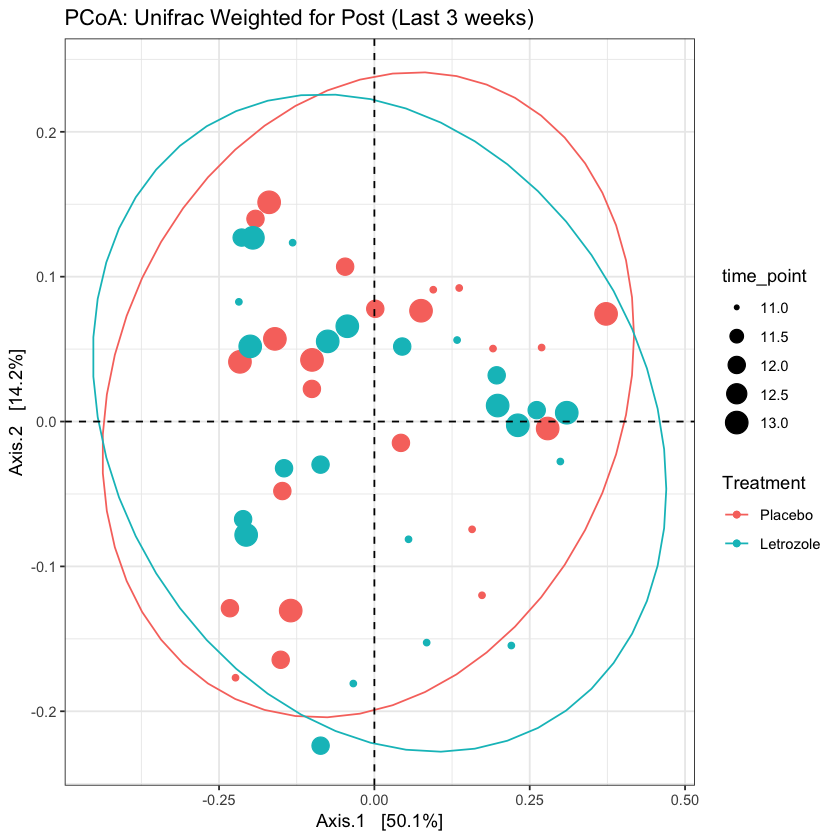

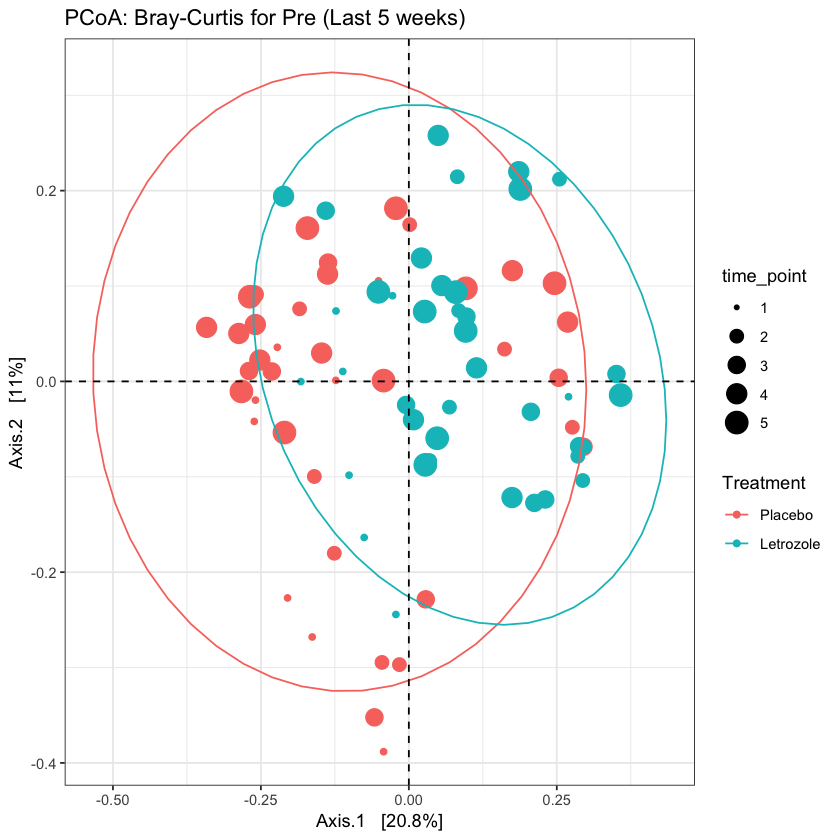

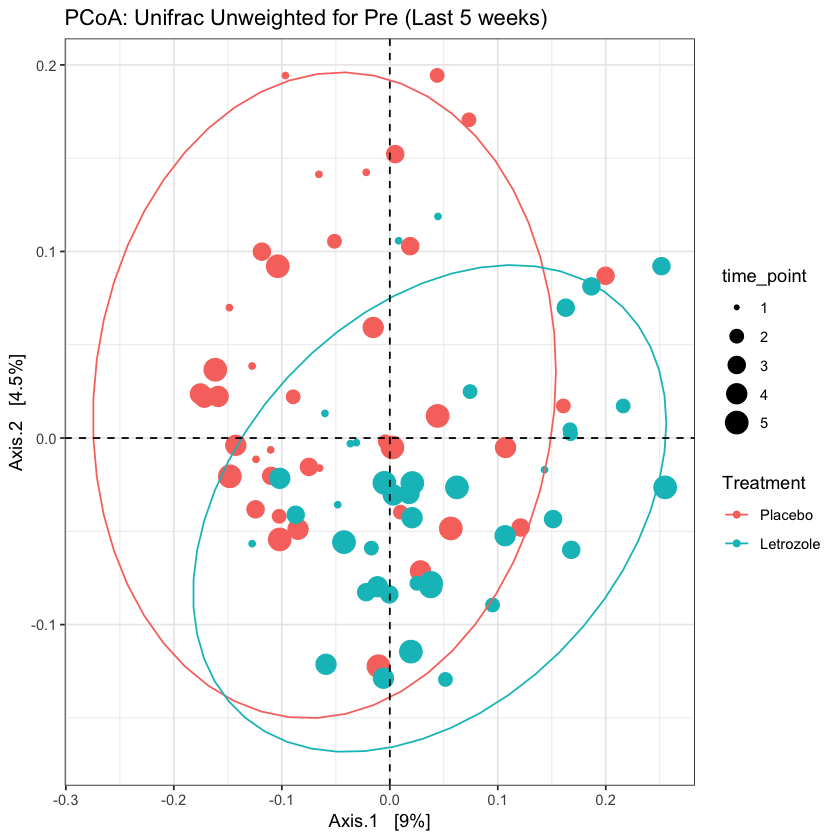

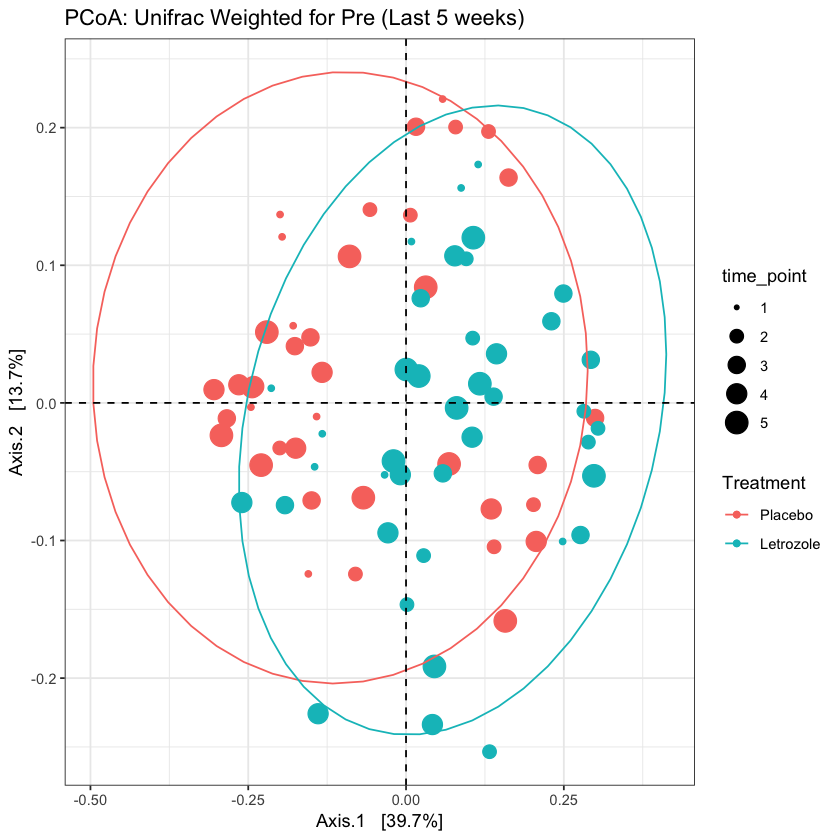

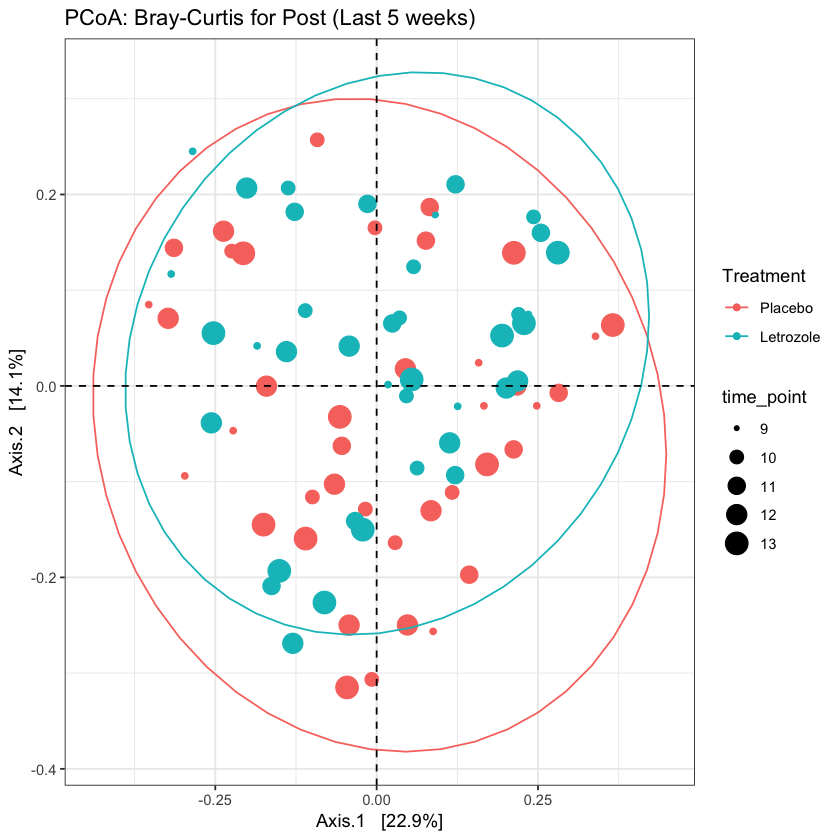

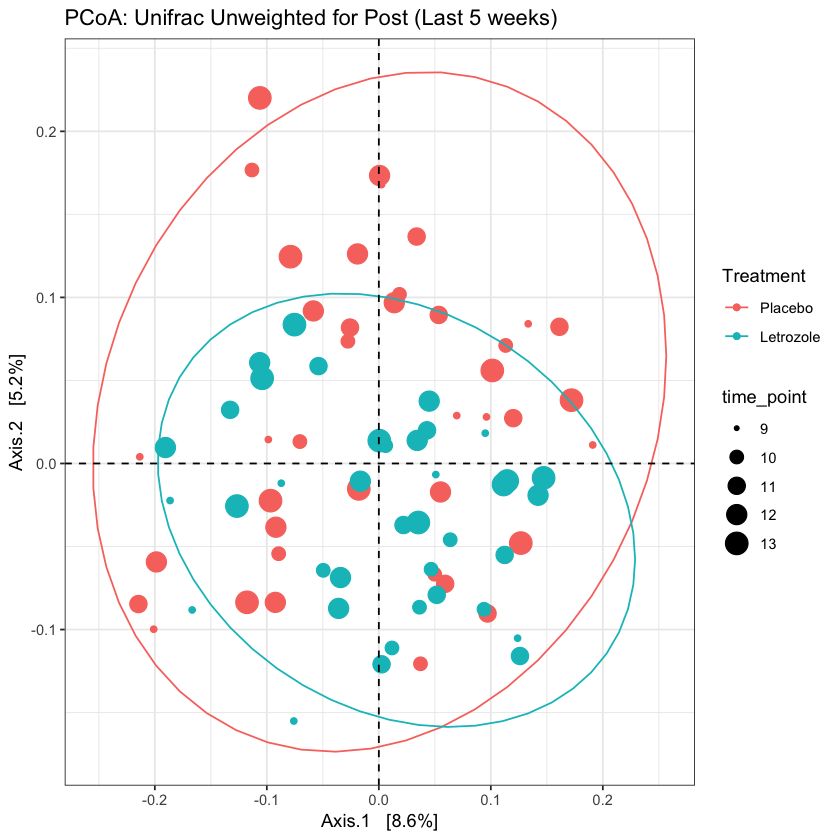

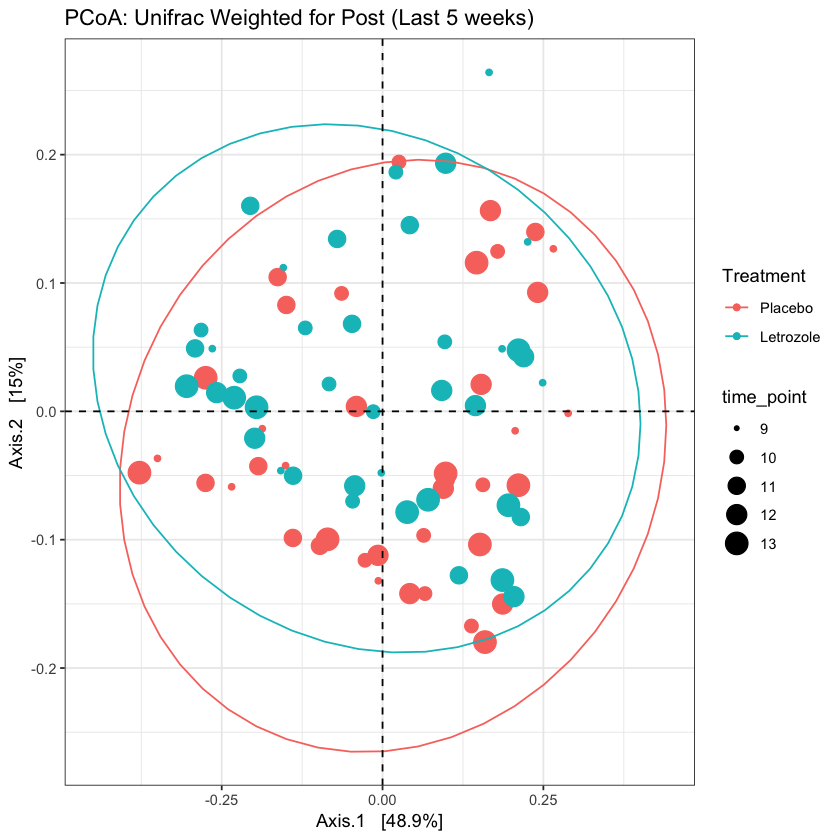

In [14]:
#--------------------------------------------------------------------------------------------------------------------#
#Title: actually plotting the ordinations
#refer to this page for more info: https://joey711.github.io/phyloseq/plot_ordination-examples.html

#For pre time point (Last three weeks)
plot_ordination(phylo_pre_last3weeks_rarified, 
                beta_div_ordination2_braycurtis_pre_last3weeks_rarified,#Bray Curtis
                color = "Treatment") +
    theme_bw() +
    geom_point(mapping = aes(size = time_point, 
                           #shape = factor(time_point) #This gives us the shapes
                          )) +
    stat_ellipse(aes(group =Treatment)) +
    ggtitle("PCoA: Bray-Curtis for Pre (Last 3 weeks)")+ geom_hline(yintercept=0,linetype=2) + 
    geom_vline(xintercept=0,linetype=2) 

plot_ordination(phylo_pre_last3weeks_rarified, 
                beta_div_ordination2_unweightedunifrac_pre_last3weeks_rarified, 
                color = "Treatment") + 
    theme_bw() +
    geom_point(mapping = aes(size = time_point, 
                           #shape = factor(time_point) #This gives us the shapes
                          )) +
    stat_ellipse(aes(group =Treatment)) +
    ggtitle("PCoA: Unifrac Unweighted for Pre (Last 3 weeks)")+ geom_hline(yintercept=0,linetype=2) + 
    geom_vline(xintercept=0,linetype=2) 

plot_ordination(phylo_pre_last3weeks_rarified, 
                beta_div_ordination2_weightedunifrac_pre_last3weeks_rarified, 
                color = "Treatment") +
    theme_bw() +
    geom_point(mapping = aes(size = time_point, 
                             #shape = factor(time_point) #This gives us the shapes
                            )) +
    stat_ellipse(aes(group =Treatment)) +
    ggtitle("PCoA: Unifrac Weighted for Pre (Last 3 weeks)")+ geom_hline(yintercept=0,linetype=2) + 
    geom_vline(xintercept=0,linetype=2) 

#--------------------------------------------------------------------------------------------------------------------#

#For post time point (Last three weeks)
plot_ordination(phylo_post_last3weeks_rarified, 
                beta_div_ordination2_braycurtis_post_last3weeks_rarified, #Bray Curtis
                color = "Treatment") +     
    theme_bw() +
    geom_point(mapping = aes(size = time_point, 
                             #shape = factor(time_point) #This gives us the shapes
                            )) +
    stat_ellipse(aes(group =Treatment)) +
    ggtitle("PCoA: Bray-Curtis for Post (Last 3 weeks)")+ geom_hline(yintercept=0,linetype=2) + 
    geom_vline(xintercept=0,linetype=2) 

plot_ordination(phylo_post_last3weeks_rarified, 
                beta_div_ordination2_unweightedunifrac_post_last3weeks_rarified, 
                color = "Treatment") +
    theme_bw() +
    geom_point(mapping = aes(size = time_point, 
                             #shape = factor(time_point) #This gives us the shapes
                            )) +
    stat_ellipse(aes(group =Treatment)) +
    ggtitle("PCoA: Unifrac Unweighted for Post (Last 3 weeks)") + geom_hline(yintercept=0,linetype=2) + 
    geom_vline(xintercept=0,linetype=2) 

plot_ordination(phylo_post_last3weeks_rarified, 
                beta_div_ordination2_weightedunifrac_post_last3weeks_rarified, 
                color = "Treatment") + 
    theme_bw() +
    geom_point(mapping = aes(size = time_point, 
                             #shape = factor(time_point) #This gives us the shapes
                            )) +
    stat_ellipse(aes(group =Treatment)) +
    ggtitle("PCoA: Unifrac Weighted for Post (Last 3 weeks)")+ geom_hline(yintercept=0,linetype=2) + 
    geom_vline(xintercept=0,linetype=2) 

#--------------------------------------------------------------------------------------------------------------------#

#For pre time point (Last five weeks)
plot_ordination(phylo_pre_last5weeks_rarified, 
                beta_div_ordination2_braycurtis_pre_last5weeks_rarified,#Bray Curtis
                color = "Treatment") +
    theme_bw() +
    geom_point(mapping = aes(size = time_point, 
                           #shape = factor(time_point) #This gives us the shapes
                          )) +
    stat_ellipse(aes(group =Treatment)) +
    ggtitle("PCoA: Bray-Curtis for Pre (Last 5 weeks)")+ geom_hline(yintercept=0,linetype=2) + 
    geom_vline(xintercept=0,linetype=2) 

plot_ordination(phylo_pre_last5weeks_rarified, 
                beta_div_ordination2_unweightedunifrac_pre_last5weeks_rarified, 
                color = "Treatment") + 
    theme_bw() +
    geom_point(mapping = aes(size = time_point, 
                           #shape = factor(time_point) #This gives us the shapes
                          )) +
    stat_ellipse(aes(group =Treatment)) +
    ggtitle("PCoA: Unifrac Unweighted for Pre (Last 5 weeks)")+ geom_hline(yintercept=0,linetype=2) + 
    geom_vline(xintercept=0,linetype=2) 

plot_ordination(phylo_pre_last5weeks_rarified, 
                beta_div_ordination2_weightedunifrac_pre_last5weeks_rarified, 
                color = "Treatment") +
    theme_bw() +
    geom_point(mapping = aes(size = time_point, 
                             #shape = factor(time_point) #This gives us the shapes
                            )) +
    stat_ellipse(aes(group =Treatment)) +
    ggtitle("PCoA: Unifrac Weighted for Pre (Last 5 weeks)")+ geom_hline(yintercept=0,linetype=2) + 
    geom_vline(xintercept=0,linetype=2) 

#--------------------------------------------------------------------------------------------------------------------#

#For post time point (Last 5 weeks)
plot_ordination(phylo_post_last5weeks_rarified, 
                beta_div_ordination2_braycurtis_post_last5weeks_rarified, #Bray Curtis
                color = "Treatment") +     
    theme_bw() +
    geom_point(mapping = aes(size = time_point, 
                             #shape = factor(time_point) #This gives us the shapes
                            )) +
    stat_ellipse(aes(group =Treatment)) +
    ggtitle("PCoA: Bray-Curtis for Post (Last 5 weeks)")+ geom_hline(yintercept=0,linetype=2) + 
    geom_vline(xintercept=0,linetype=2) 

plot_ordination(phylo_post_last5weeks_rarified, 
                beta_div_ordination2_unweightedunifrac_post_last5weeks_rarified, 
                color = "Treatment") +
    theme_bw() +
    geom_point(mapping = aes(size = time_point, 
                             #shape = factor(time_point) #This gives us the shapes
                            )) +
    stat_ellipse(aes(group =Treatment)) +
    ggtitle("PCoA: Unifrac Unweighted for Post (Last 5 weeks)") + geom_hline(yintercept=0,linetype=2) + 
    geom_vline(xintercept=0,linetype=2) 

plot_ordination(phylo_post_last5weeks_rarified, 
                beta_div_ordination2_weightedunifrac_post_last5weeks_rarified, 
                color = "Treatment") + 
    theme_bw() +
    geom_point(mapping = aes(size = time_point)) +
    stat_ellipse(aes(group =Treatment)) +
    ggtitle("PCoA: Unifrac Weighted for Post (Last 5 weeks)")+ geom_hline(yintercept=0,linetype=2) + 
    geom_vline(xintercept=0,linetype=2) 

#--------------------------------------------------------------------------------------------------------------------#

#Functions:
#plot_ordination()
     
   


[1] Placebo   Placebo   Placebo   Placebo   Placebo   Placebo   Placebo  
 [8] Placebo   Placebo   Placebo   Placebo   Placebo   Placebo   Placebo  
[15] Placebo   Placebo   Placebo   Placebo   Placebo   Placebo   Placebo  
[22] Placebo   Placebo   Placebo   Letrozole Letrozole Letrozole Letrozole
[29] Letrozole Letrozole Letrozole Letrozole Letrozole Letrozole Letrozole
[36] Letrozole Letrozole Letrozole Letrozole Letrozole Letrozole Letrozole
[43] Letrozole Letrozole Letrozole Letrozole Letrozole Letrozole
Levels: Placebo Letrozole

Df Sum Sq      Mean Sq     F value  Pr(>F)    
Groups     1 0.008130335 0.008130335 3.181334 0.08108192
Residuals 46 0.117559320 0.002555637       NA         NA

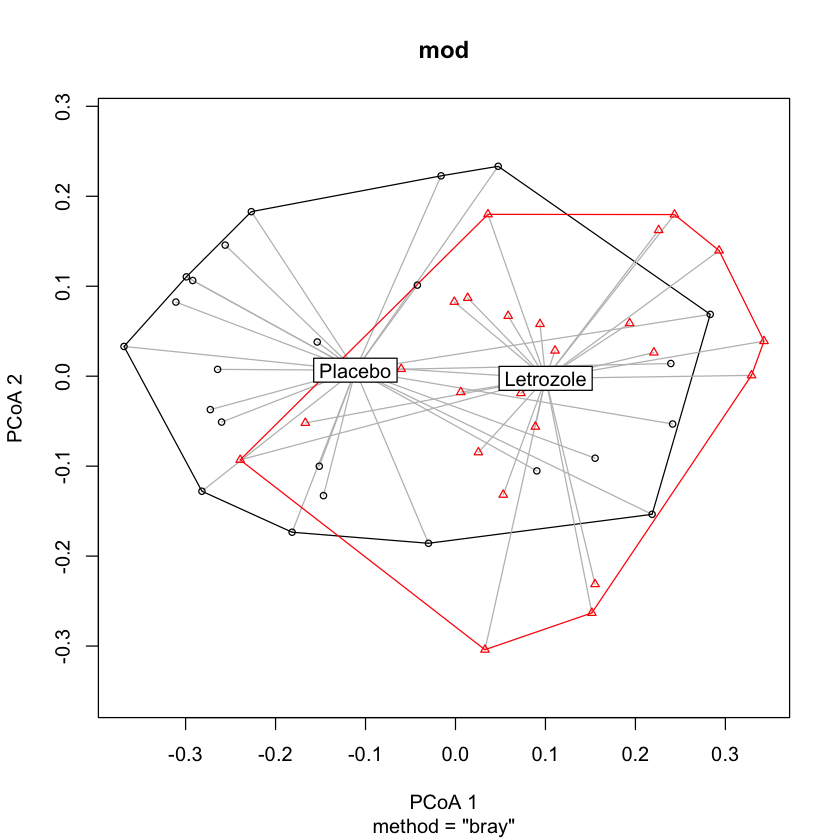

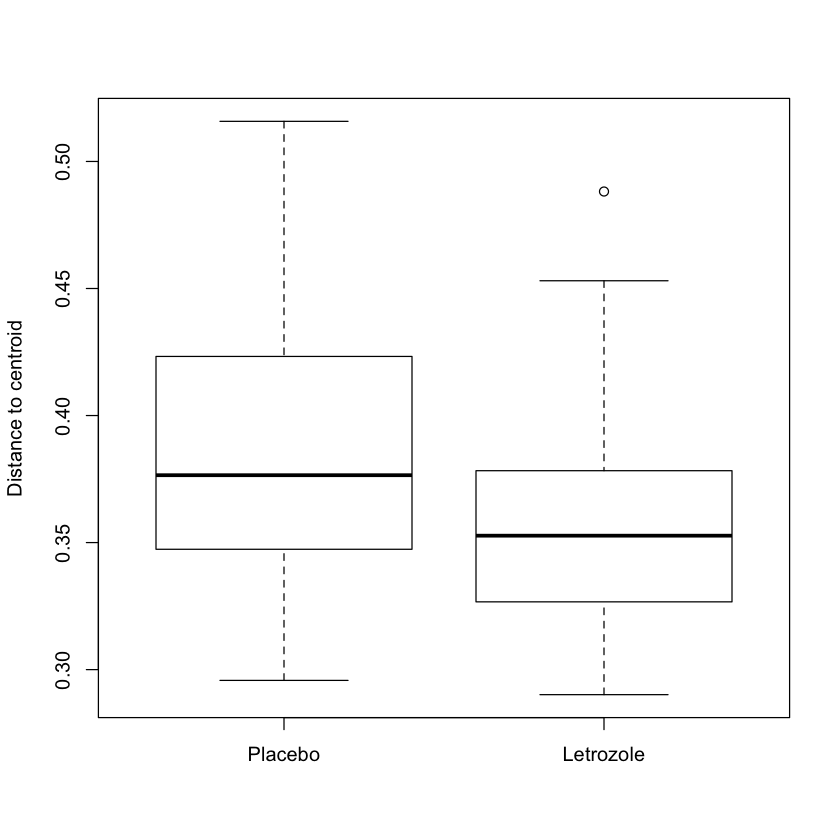

[1] Placebo   Placebo   Placebo   Placebo   Placebo   Placebo   Placebo  
 [8] Placebo   Placebo   Placebo   Placebo   Placebo   Placebo   Placebo  
[15] Placebo   Placebo   Placebo   Placebo   Placebo   Placebo   Placebo  
[22] Placebo   Placebo   Placebo   Letrozole Letrozole Letrozole Letrozole
[29] Letrozole Letrozole Letrozole Letrozole Letrozole Letrozole Letrozole
[36] Letrozole Letrozole Letrozole Letrozole Letrozole Letrozole Letrozole
[43] Letrozole Letrozole Letrozole Letrozole Letrozole Letrozole
Levels: Placebo Letrozole

Df Sum Sq       Mean Sq      F value     Pr(>F)   
Groups     1 2.644523e-05 2.644523e-05 0.008858511 0.9254229
Residuals 46 1.373234e-01 2.985291e-03          NA        NA

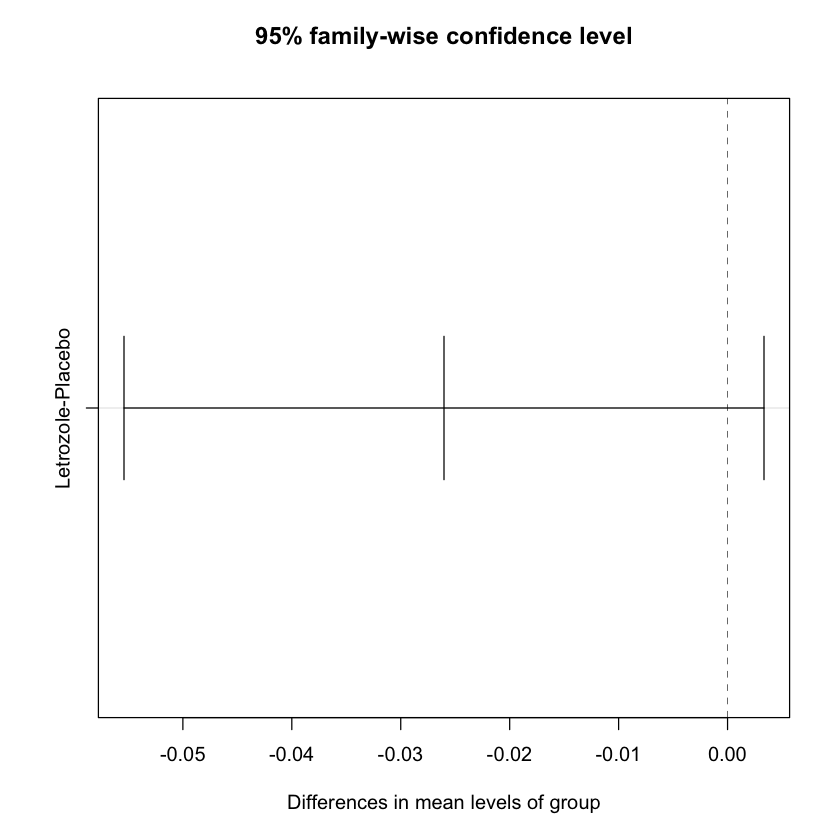

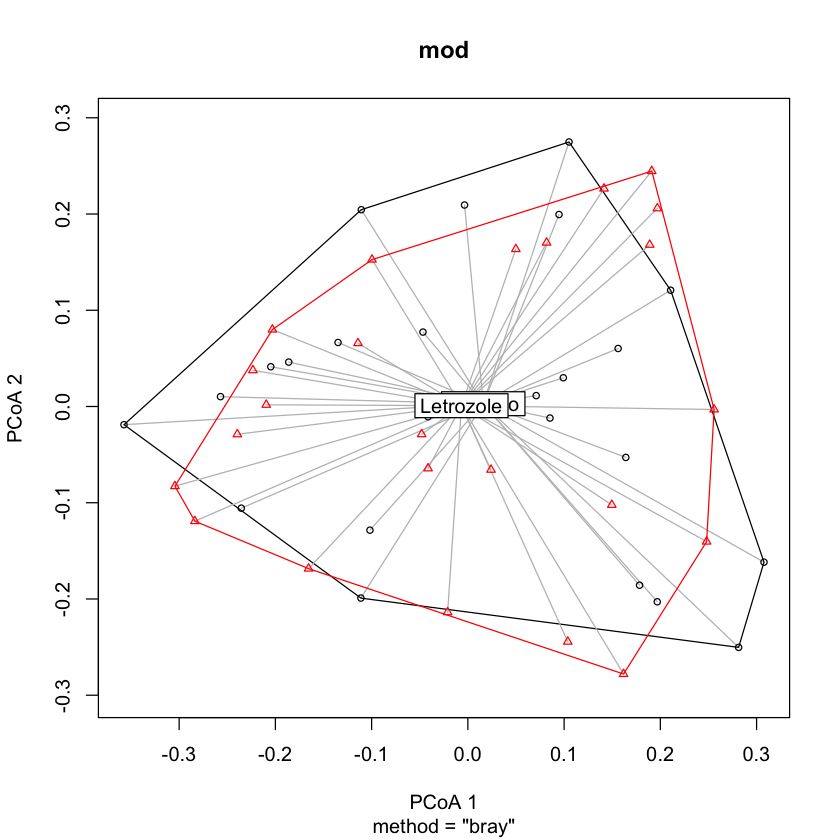

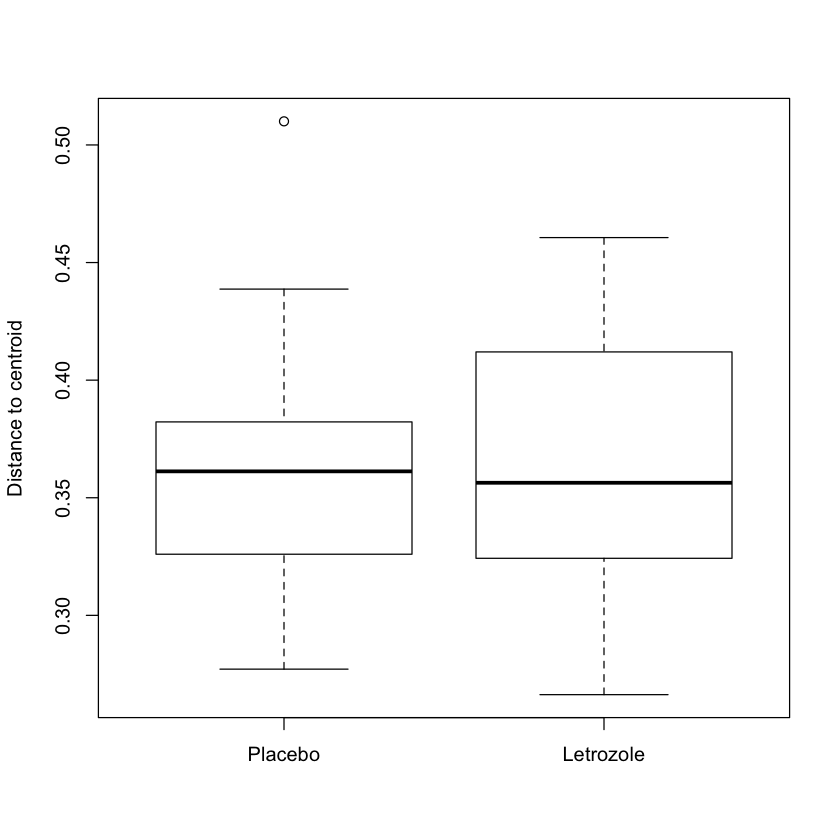

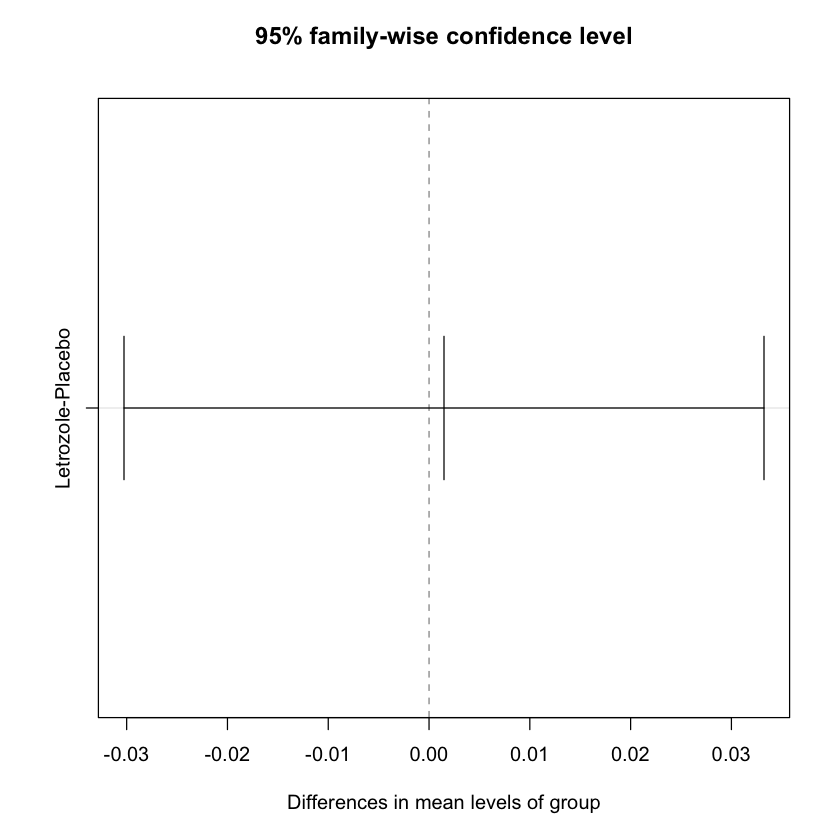

In [15]:
#--------------------------------------------------------------------------------------------------------------------#
#Title: Centroid analysis (Preliminary)
#refer to this page for more info: https://joey711.github.io/phyloseq/plot_ordination-examples.html

#For Pre time point (Last three weeks) (Bray curtis) basic centroid analysis

#take your distances you generated, then generate a mapping file dataframe to 
#use to assign your groups of interest (sounds like treatments in your case), 
#use betadisper (which is a PERMDISP) to examine group variances, and perform an anova on the output of betadisper.
data_frame_phylo_pre_last3weeks_rarified = as(sample_data(phylo_pre_last3weeks_rarified),"data.frame")
groups <- data_frame_phylo_pre_last3weeks_rarified[["Treatment"]]
groups
mod <- betadisper(beta_div_distance1_braycurtis_pre_last3weeks_rarified, groups)
anova(mod)
plot(mod)
boxplot(mod)
mod.HSD <- TukeyHSD(mod )
plot(mod.HSD)

#--------------------------------------------------------------------------------------------------------------------#

#For Post time point (Last three weeks) (Bray curtis) basic centroid analysis

#take your distances you generated, then generate a mapping file dataframe to 
#use to assign your groups of interest (sounds like treatments in your case), 
#use betadisper (which is a PERMDISP) to examine group variances, and perform an anova on the output of betadisper.
data_frame_phylo_post_last3weeks_rarified = as(sample_data(phylo_post_last3weeks_rarified),"data.frame")
groups <- data_frame_phylo_post_last3weeks_rarified[["Treatment"]]
groups
mod <- betadisper(beta_div_distance1_braycurtis_post_last3weeks_rarified, groups)
anova(mod)
plot(mod)
boxplot(mod)
mod.HSD <- TukeyHSD(mod )
plot(mod.HSD)

#--------------------------------------------------------------------------------------------------------------------#






[1] Placebo   Placebo   Placebo   Placebo   Placebo   Placebo   Placebo  
 [8] Placebo   Placebo   Placebo   Placebo   Placebo   Placebo   Placebo  
[15] Placebo   Placebo   Placebo   Placebo   Placebo   Placebo   Placebo  
[22] Placebo   Placebo   Placebo   Letrozole Letrozole Letrozole Letrozole
[29] Letrozole Letrozole Letrozole Letrozole Letrozole Letrozole Letrozole
[36] Letrozole Letrozole Letrozole Letrozole Letrozole Letrozole Letrozole
[43] Letrozole Letrozole Letrozole Letrozole Letrozole Letrozole
Levels: Placebo Letrozole

Df Sum Sq       Mean Sq      F value   Pr(>F)   
Groups     1 0.0002774857 0.0002774857 0.2908451 0.5922804
Residuals 46 0.0438870858 0.0009540671        NA        NA

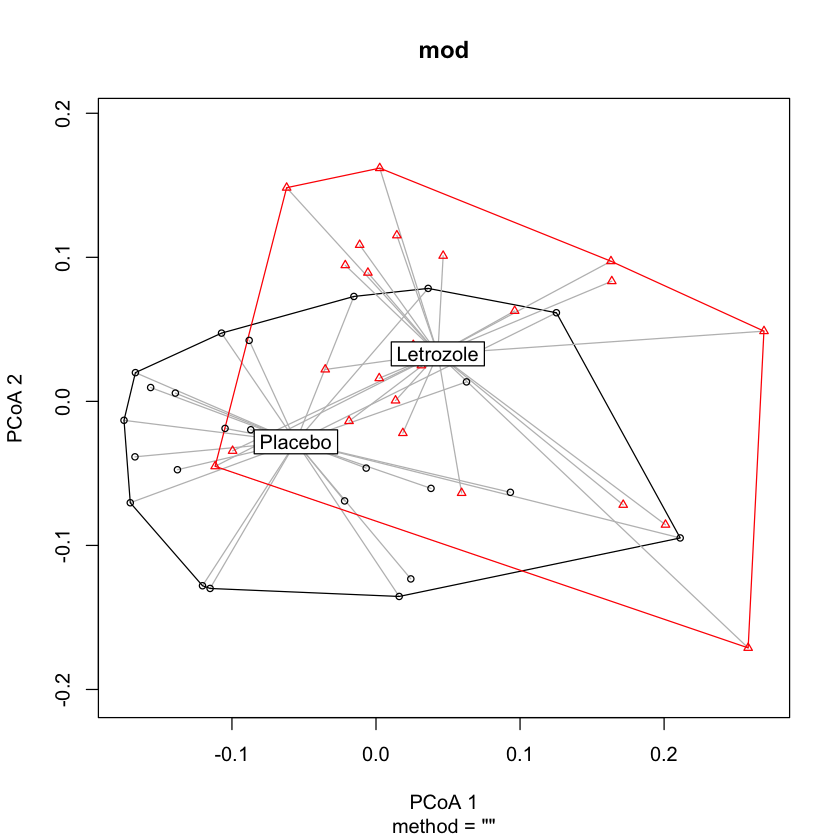

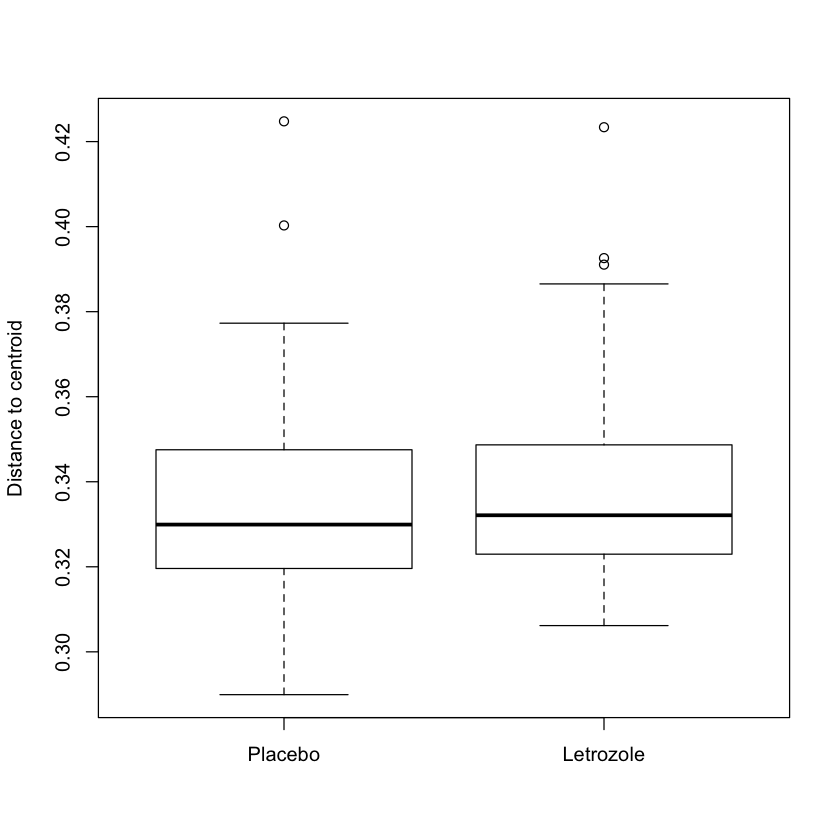

[1] Placebo   Placebo   Placebo   Placebo   Placebo   Placebo   Placebo  
 [8] Placebo   Placebo   Placebo   Placebo   Placebo   Placebo   Placebo  
[15] Placebo   Placebo   Placebo   Placebo   Placebo   Placebo   Placebo  
[22] Placebo   Placebo   Placebo   Letrozole Letrozole Letrozole Letrozole
[29] Letrozole Letrozole Letrozole Letrozole Letrozole Letrozole Letrozole
[36] Letrozole Letrozole Letrozole Letrozole Letrozole Letrozole Letrozole
[43] Letrozole Letrozole Letrozole Letrozole Letrozole Letrozole
Levels: Placebo Letrozole

Df Sum Sq       Mean Sq      F value  Pr(>F)   
Groups     1 3.302955e-05 3.302955e-05 0.059089 0.8090224
Residuals 46 2.571306e-02 5.589796e-04       NA        NA

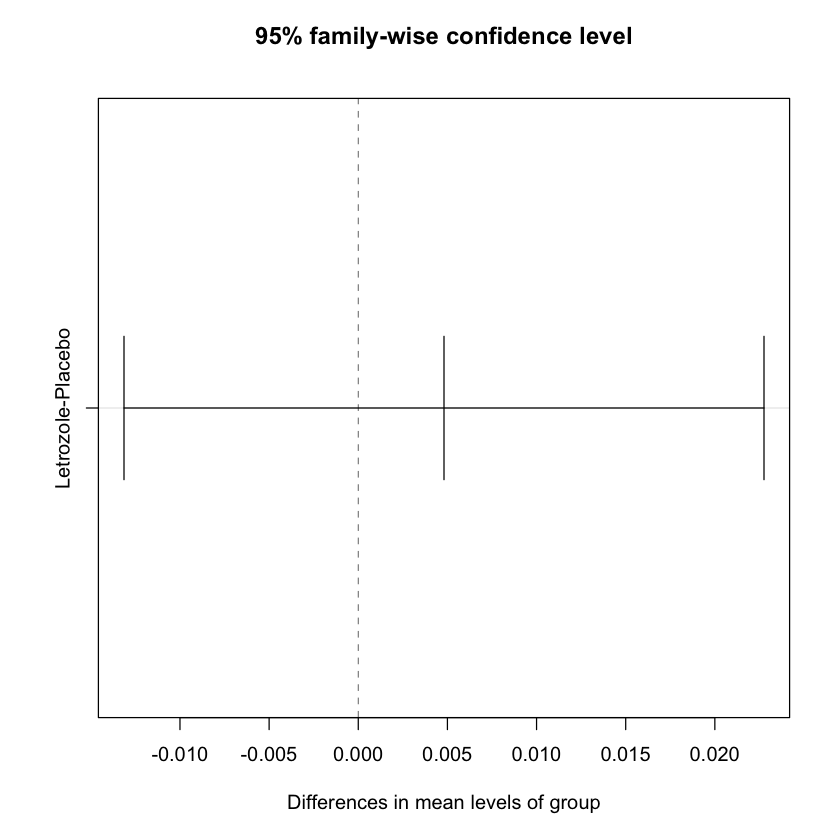

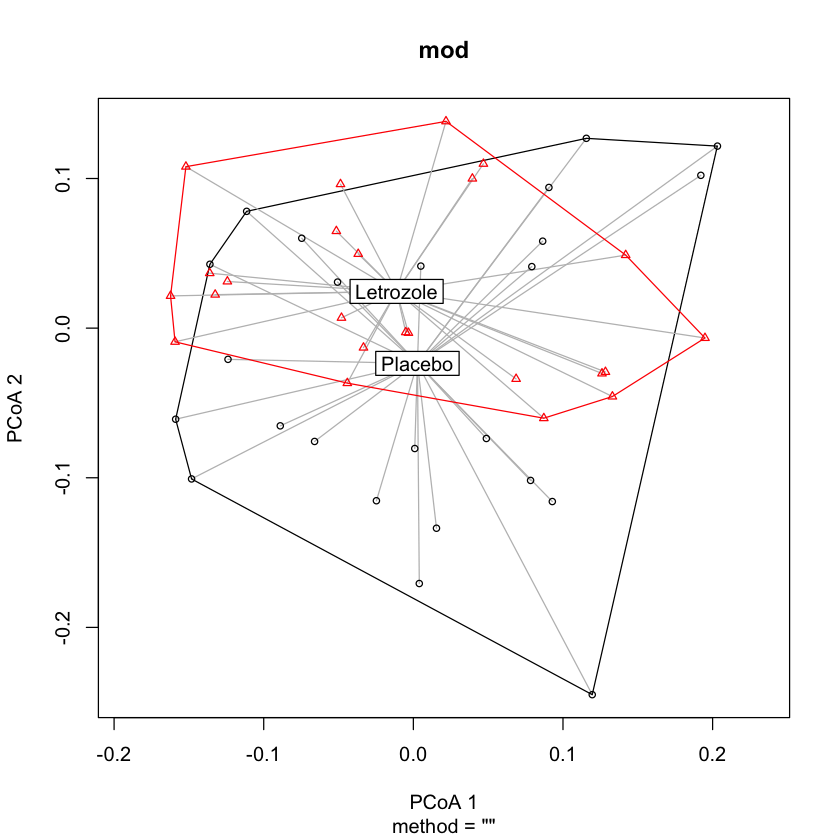

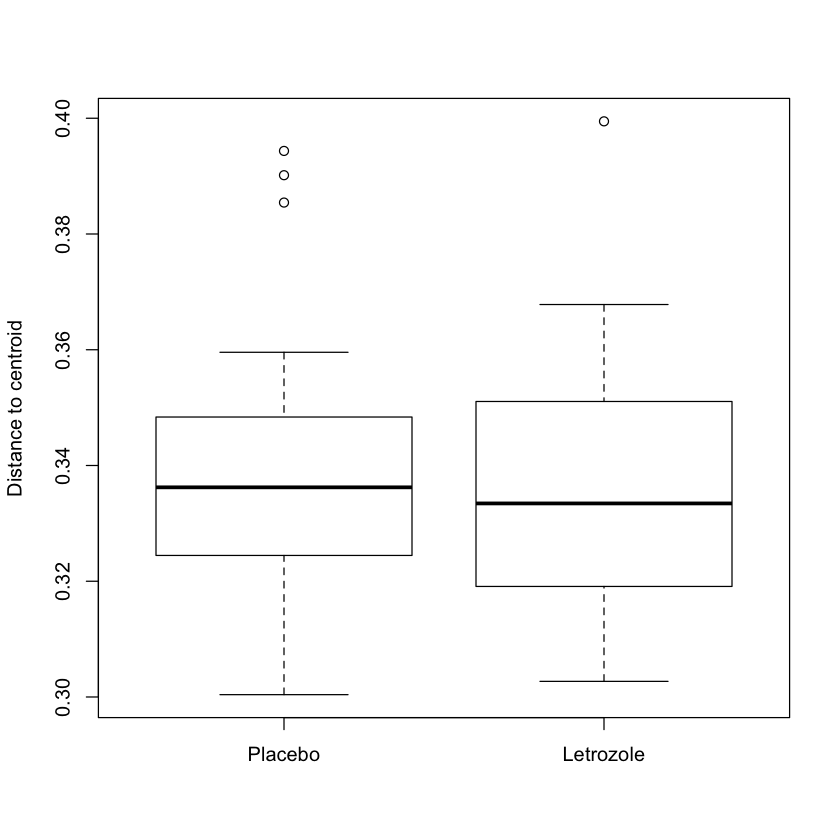

[1] Placebo   Placebo   Placebo   Placebo   Placebo   Placebo   Placebo  
 [8] Placebo   Placebo   Placebo   Placebo   Placebo   Placebo   Placebo  
[15] Placebo   Placebo   Placebo   Placebo   Placebo   Placebo   Placebo  
[22] Placebo   Placebo   Placebo   Letrozole Letrozole Letrozole Letrozole
[29] Letrozole Letrozole Letrozole Letrozole Letrozole Letrozole Letrozole
[36] Letrozole Letrozole Letrozole Letrozole Letrozole Letrozole Letrozole
[43] Letrozole Letrozole Letrozole Letrozole Letrozole Letrozole
Levels: Placebo Letrozole

Df Sum Sq      Mean Sq     F value  Pr(>F)   
Groups     1 0.004804979 0.004804979 1.036765 0.3139006
Residuals 46 0.213191032 0.004634588       NA        NA

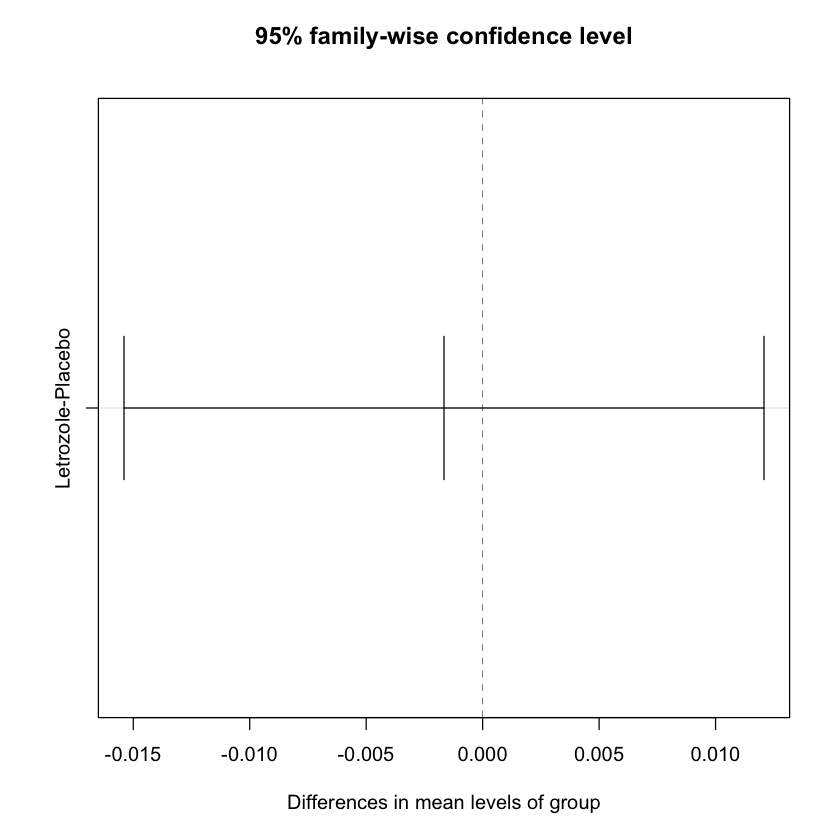

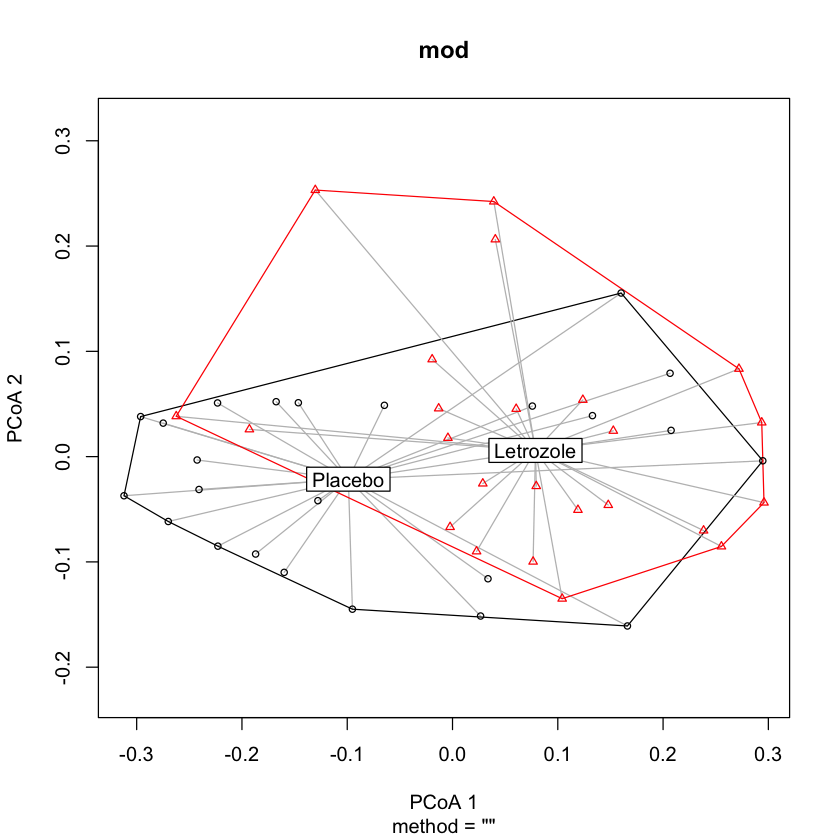

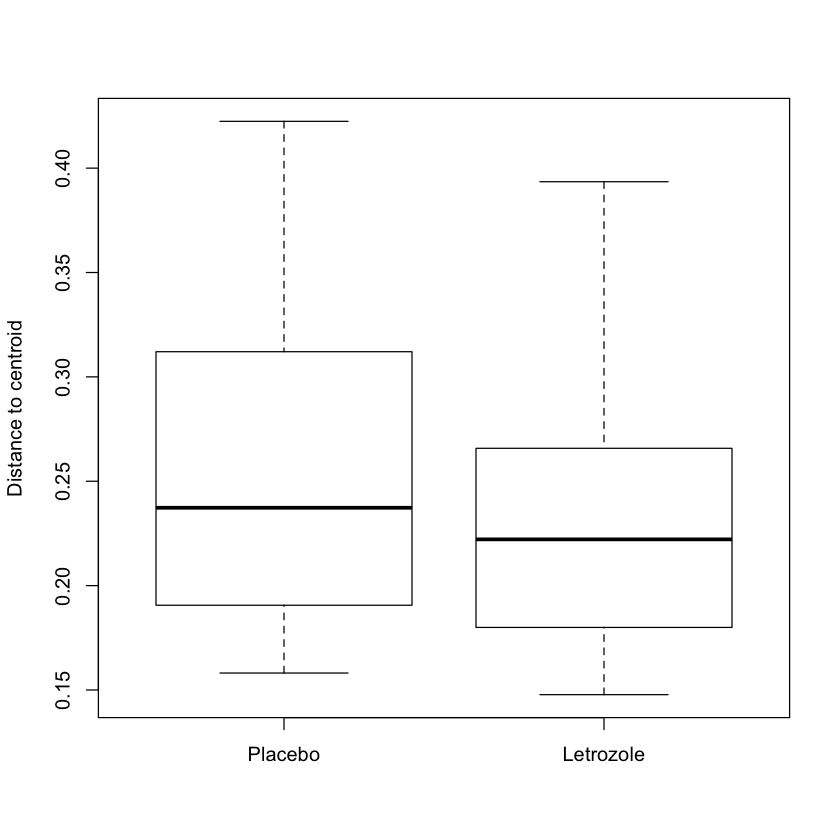

[1] Placebo   Placebo   Placebo   Placebo   Placebo   Placebo   Placebo  
 [8] Placebo   Placebo   Placebo   Placebo   Placebo   Placebo   Placebo  
[15] Placebo   Placebo   Placebo   Placebo   Placebo   Placebo   Placebo  
[22] Placebo   Placebo   Placebo   Letrozole Letrozole Letrozole Letrozole
[29] Letrozole Letrozole Letrozole Letrozole Letrozole Letrozole Letrozole
[36] Letrozole Letrozole Letrozole Letrozole Letrozole Letrozole Letrozole
[43] Letrozole Letrozole Letrozole Letrozole Letrozole Letrozole
Levels: Placebo Letrozole

Df Sum Sq       Mean Sq      F value    Pr(>F)   
Groups     1 0.0001241295 0.0001241295 0.02819494 0.8673874
Residuals 46 0.2025169723 0.0044025429         NA        NA

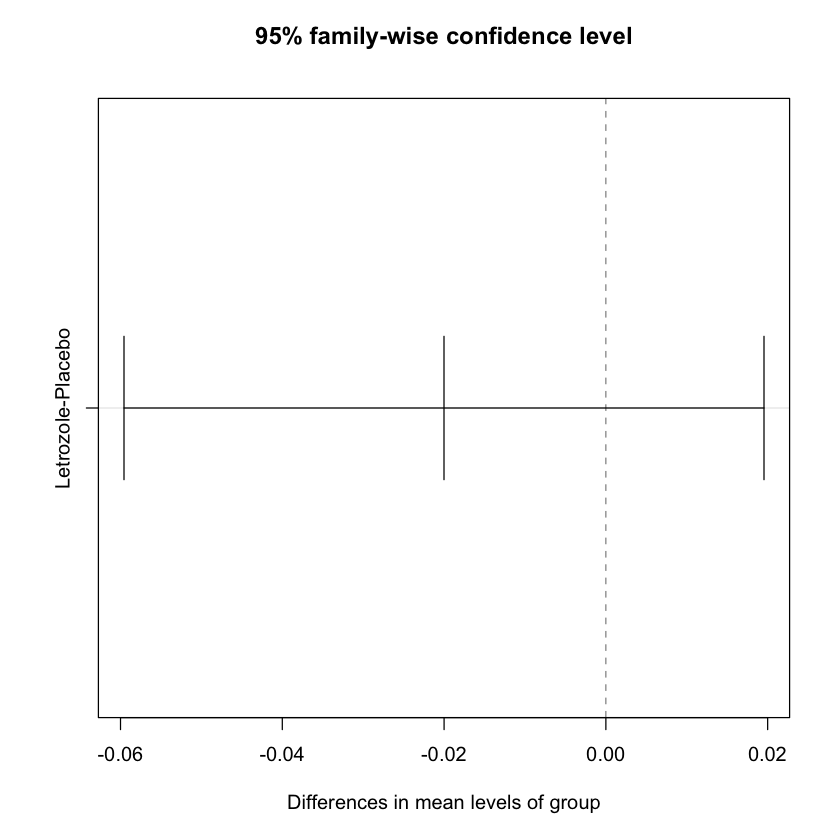

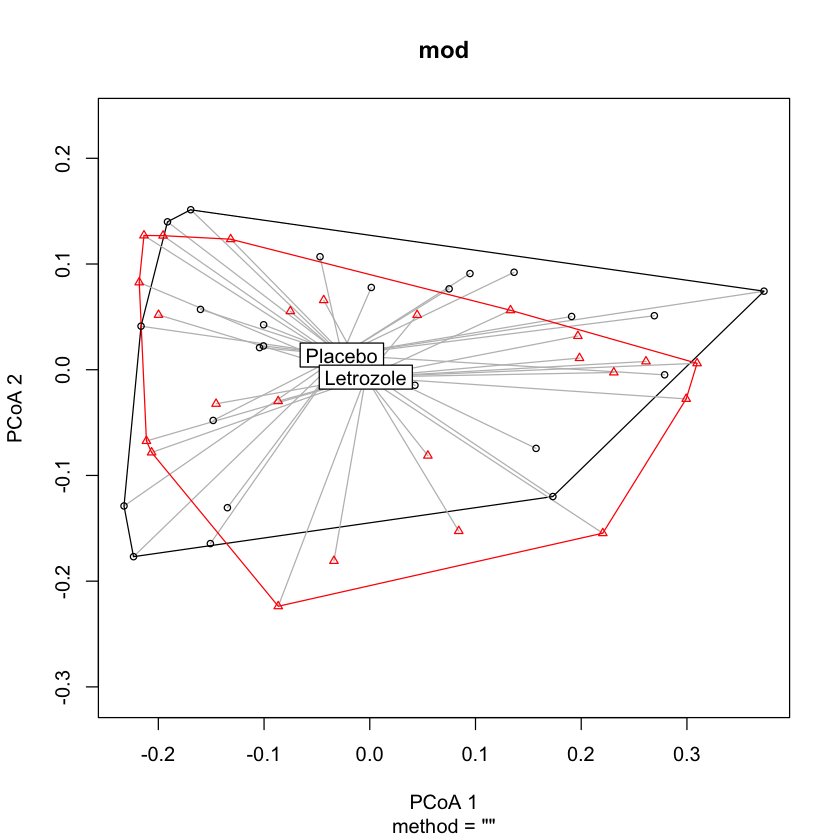

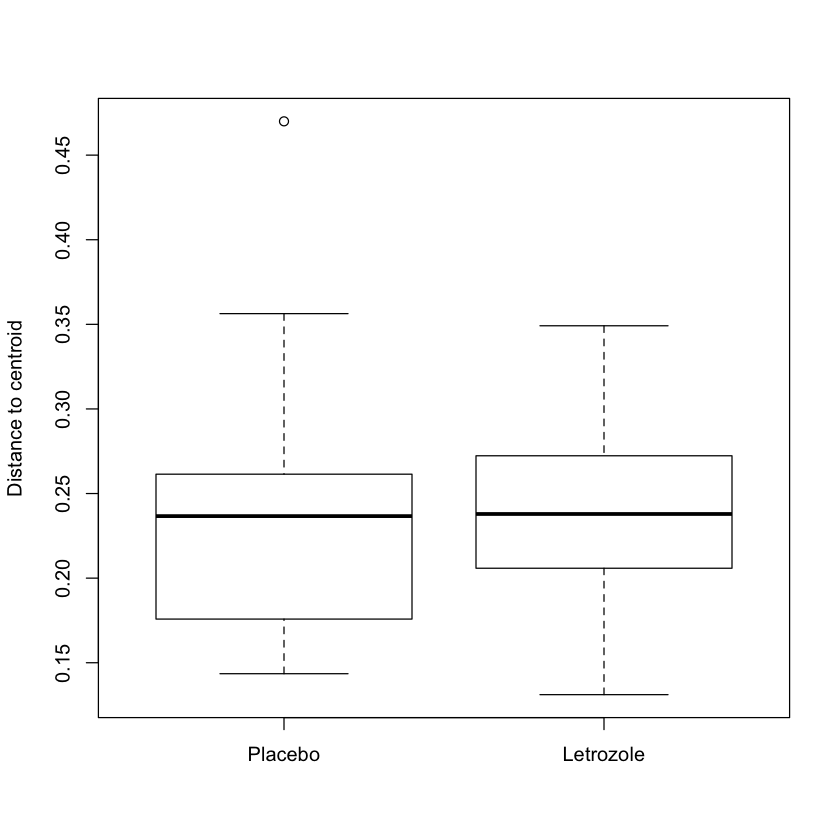

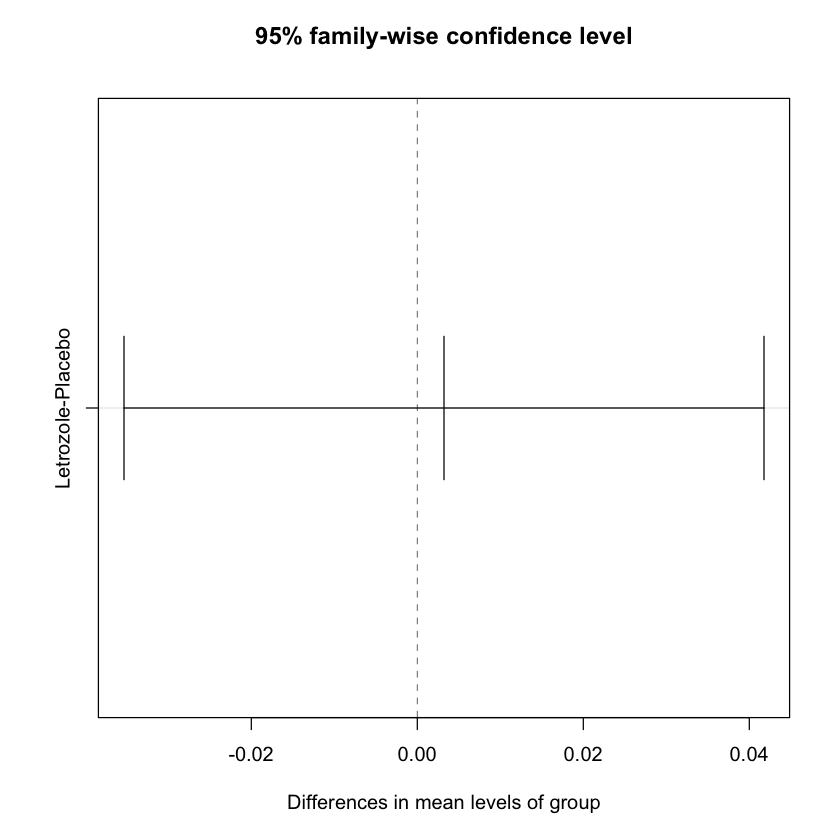

In [16]:
#--------------------------------------------------------------------------------------------------------------------#
#Title: Centroid analysis (Preliminary)
#refer to this page for more info: https://joey711.github.io/phyloseq/plot_ordination-examples.html

#For Pre time point (Last three weeks) unweighted unifrac

#take your distances you generated, then generate a mapping file dataframe to 
#use to assign your groups of interest (sounds like treatments in your case), 
#use betadisper (which is a PERMDISP) to examine group variances, and perform an anova on the output of betadisper.
data_frame_phylo_pre_last3weeks_rarified = as(sample_data(phylo_pre_last3weeks_rarified),"data.frame")
groups <- data_frame_phylo_pre_last3weeks_rarified[["Treatment"]]
groups
mod <- betadisper(beta_div_distance1_unweightedunifrac_pre_last3weeks_rarified, groups)
anova(mod)
plot(mod)
boxplot(mod)
mod.HSD <- TukeyHSD(mod )
plot(mod.HSD)

#--------------------------------------------------------------------------------------------------------------------#

#For Post time point (Last three weeks) unweighted unifrac

#take your distances you generated, then generate a mapping file dataframe to 
#use to assign your groups of interest (sounds like treatments in your case), 
#use betadisper (which is a PERMDISP) to examine group variances, and perform an anova on the output of betadisper.
data_frame_phylo_post_last3weeks_rarified = as(sample_data(phylo_post_last3weeks_rarified),"data.frame")
groups <- data_frame_phylo_post_last3weeks_rarified[["Treatment"]]
groups
mod <- betadisper(beta_div_distance1_unweightedunifrac_post_last3weeks_rarified, groups)
anova(mod)
plot(mod)
boxplot(mod)
mod.HSD <- TukeyHSD(mod )
plot(mod.HSD)

#--------------------------------------------------------------------------------------------------------------------#

#For Pre time point (Last three weeks) weighted unifrac

#take your distances you generated, then generate a mapping file dataframe to 
#use to assign your groups of interest (sounds like treatments in your case), 
#use betadisper (which is a PERMDISP) to examine group variances, and perform an anova on the output of betadisper.
data_frame_phylo_pre_last3weeks_rarified = as(sample_data(phylo_pre_last3weeks_rarified),"data.frame")
groups <- data_frame_phylo_pre_last3weeks_rarified[["Treatment"]]
groups
mod <- betadisper(beta_div_distance1_weightedunifrac_pre_last3weeks_rarified, groups)
anova(mod)
plot(mod)
boxplot(mod)
mod.HSD <- TukeyHSD(mod )
plot(mod.HSD)

#--------------------------------------------------------------------------------------------------------------------#

#For Post time point (Last three weeks) weighted unifrac

#take your distances you generated, then generate a mapping file dataframe to 
#use to assign your groups of interest (sounds like treatments in your case), 
#use betadisper (which is a PERMDISP) to examine group variances, and perform an anova on the output of betadisper.
data_frame_phylo_post_last3weeks_rarified = as(sample_data(phylo_post_last3weeks_rarified),"data.frame")
groups <- data_frame_phylo_post_last3weeks_rarified[["Treatment"]]
groups
mod <- betadisper(beta_div_distance1_weightedunifrac_post_last3weeks_rarified, groups)
anova(mod)
plot(mod)
boxplot(mod)
mod.HSD <- TukeyHSD(mod )
plot(mod.HSD)

#--------------------------------------------------------------------------------------------------------------------#





Df Sum Sq       Mean Sq      F value  Pr(>F)   
Groups     1 0.0006968038 0.0006968038 1.005672 0.3190429
Residuals 78 0.0540441596 0.0006928738       NA        NA


	Homogeneity of multivariate dispersions

Call: betadisper(d =
beta_div_distance1_unweightedunifrac_pre_last5weeks_rarified, group =
groups)

No. of Positive Eigenvalues: 79
No. of Negative Eigenvalues: 0

Average distance to median:
  Placebo Letrozole 
   0.3427    0.3486 

Eigenvalues for PCoA axes:
(Showing 8 of 79 eigenvalues)
 PCoA1  PCoA2  PCoA3  PCoA4  PCoA5  PCoA6  PCoA7  PCoA8 
0.8931 0.4479 0.3549 0.2939 0.2824 0.2685 0.2568 0.2305 

Df Sum Sq       Mean Sq      F value  Pr(>F)  
Groups     1 0.0005442042 0.0005442042 1.042253 0.310454
Residuals 78 0.0407270720 0.0005221419       NA       NA

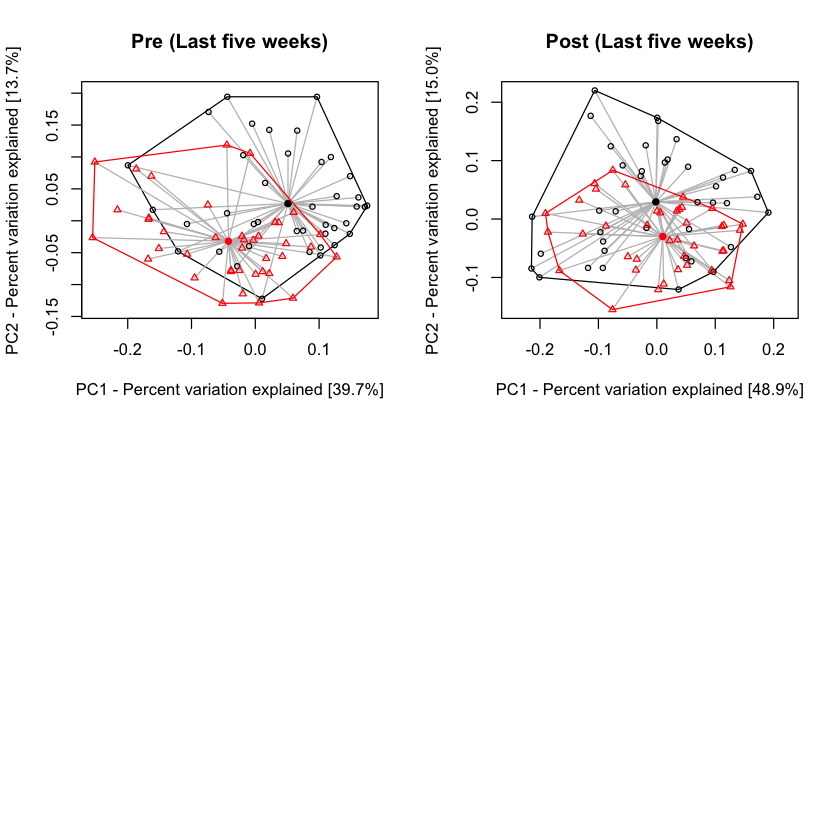

In [19]:
#--------------------------------------------------------------------------------------------------------------------#
par(mfrow=c(2,2))
#pdf("~/Documents/Paper on Organizational Activational Letrozole PCOS/figures_1_29_19/pdf_centroids_div_2.pdf", width = 4, height = 4) # Open a new pdf file

#--------------------------------------------------------------------------------------------------------------------#
#Title: Centroid analysis (Preliminary)
#refer to this page for more info: https://joey711.github.io/phyloseq/plot_ordination-examples.html

#For Pre time point (Last five weeks) weighted unifrac

#take your distances you generated, then generate a mapping file dataframe to 
#use to assign your groups of interest (sounds like treatments in your case), 
#use betadisper (which is a PERMDISP) to examine group variances, and perform an anova on the output of betadisper.
data_frame_phylo_pre_last5weeks_rarified = as(sample_data(phylo_pre_last5weeks_rarified),"data.frame")
groups <- data_frame_phylo_pre_last5weeks_rarified[["Treatment"]]
#groups
mod <- betadisper(beta_div_distance1_unweightedunifrac_pre_last5weeks_rarified, groups)
anova(mod)
#plot(mod)
#boxplot(mod) #This generates a box plot of the centroid value 
#mod.HSD <- TukeyHSD(mod )
#plot(mod.HSD) #This plots the 95% family-wise confidence level
#centroid_plot_pre_last3weeks_rarified <- plot(mod)
#centroid_plot_pre_last3weeks_rarified_ggplot <- centroid_plot_pre_last3weeks_rarified 
#centroid_plot_pre_last3weeks_rarified_ggplot
mod
plot(mod, hull = TRUE, label = FALSE,
    xlab = "PC1 - Percent variation explained [39.7%]",
    ylab = "PC2 - Percent variation explained [13.7%]",
    main = "Pre (Last five weeks)",
    sub = "", #This is so we don't get that stupid bottom label that says main = ""
    col = c("black","red"),
    seg.col = c("gray","gray")) #Color of the actual segments 
#placebo is 1st in order, letrozole is 2nd in order

#--------------------------------------------------------------------------------------------------------------------#

#For Post time point (Last five weeks) weighted unifrac

#take your distances you generated, then generate a mapping file dataframe to 
#use to assign your groups of interest (sounds like treatments in your case), 
#use betadisper (which is a PERMDISP) to examine group variances, and perform an anova on the output of betadisper.
data_frame_phylo_post_last5weeks_rarified = as(sample_data(phylo_post_last5weeks_rarified),"data.frame")
groups <- data_frame_phylo_post_last5weeks_rarified[["Treatment"]]
#groups
mod <- betadisper(beta_div_distance1_unweightedunifrac_post_last5weeks_rarified, groups)
anova(mod)
#plot(mod)
#boxplot(mod) #This generates a box plot of the centroid value 
#mod.HSD <- TukeyHSD(mod )
#plot(mod.HSD) #This plots the 95% family-wise confidence level
#centroid_plot_pre_last3weeks_rarified <- plot(mod)
#centroid_plot_pre_last3weeks_rarified_ggplot <- centroid_plot_pre_last3weeks_rarified 
#centroid_plot_pre_last3weeks_rarified_ggplot

plot(mod, hull = TRUE, label = FALSE,
    xlab = "PC1 - Percent variation explained [48.9%]",
    ylab = "PC2 - Percent variation explained [15.0%]",
    main = "Post (Last five weeks)",
    sub = "",
    col = c("black","red"),
    seg.col = c("gray","gray")) #Color of the actual segments 
#placebo is 1st in order, letrozole is 2nd in order

#dev.off() # Close the file



In [20]:
?betadisper

In [21]:
#--------------------------------------------------------------------------------------------------------------------#
#Title: Performing the statistical test
#refer to this page for more info: https://joey711.github.io/phyloseq/plot_ordination-examples.html

#For pre time point (Last three weeks)
set.seed(123)
print('Unweighted Unifrac Permanova For pre time point (Last three weeks)')
a=adonis(beta_div_distance1_unweightedunifrac_pre_last3weeks_rarified ~  Treatment+time_point, as(sample_data(phylo_pre_last3weeks_rarified), "data.frame"), permutations=10000, method='unifrac', weighted=FALSE)
a$aov.tab

set.seed(123)
print('Weighted Unifrac Permanova For pre time point (Last three weeks)')
a=adonis(beta_div_distance1_weightedunifrac_pre_last3weeks_rarified ~  Treatment+time_point, as(sample_data(phylo_pre_last3weeks_rarified), "data.frame"), permutations=10000, method='unifrac')
a$aov.tab

set.seed(123)
print('Bray curtis Permanova For pre time point (Last three weeks)')
a=adonis(beta_div_distance1_braycurtis_pre_last3weeks_rarified ~  Treatment+time_point, as(sample_data(phylo_pre_last3weeks_rarified), "data.frame"), permutations=10000, method='bray')
a$aov.tab

#--------------------------------------------------------------------------------------------------------------------#

#For Post time point (Last three weeks)
set.seed(123)
print('Unweighted Unifrac Permanova For Post time point (Last three weeks)')
a=adonis(beta_div_distance1_unweightedunifrac_post_last3weeks_rarified ~  Treatment+time_point, as(sample_data(phylo_post_last3weeks_rarified), "data.frame"), permutations=10000, method='unifrac', weighted=FALSE)
a$aov.tab

set.seed(123)
print('Weighted Unifrac Permanova For Post time point (Last three weeks)')
a=adonis(beta_div_distance1_weightedunifrac_post_last3weeks_rarified ~  Treatment+time_point, as(sample_data(phylo_post_last3weeks_rarified), "data.frame"), permutations=10000, method='unifrac')
a$aov.tab

set.seed(123)
print('Bray curtis Permanova For Post time point (Last three weeks)')
a=adonis(beta_div_distance1_braycurtis_post_last3weeks_rarified ~  Treatment+time_point, as(sample_data(phylo_post_last3weeks_rarified), "data.frame"), permutations=10000, method='bray')
a$aov.tab

#--------------------------------------------------------------------------------------------------------------------#

#For pre time point (Last three weeks)
set.seed(123)
print('Unweighted Unifrac Permanova For pre time point (Last 5 weeks)')
a=adonis(beta_div_distance1_unweightedunifrac_pre_last5weeks_rarified ~  Treatment, as(sample_data(phylo_pre_last5weeks_rarified), "data.frame"), permutations=10000, method='unifrac', weighted=FALSE)
a$aov.tab

set.seed(123)
print('Weighted Unifrac Permanova For pre time point (Last 5 weeks)')
a=adonis(beta_div_distance1_weightedunifrac_pre_last5weeks_rarified ~  Treatment, as(sample_data(phylo_pre_last5weeks_rarified), "data.frame"), permutations=10000, method='wunifrac')
a$aov.tab

set.seed(123)
print('Bray curtis Permanova For pre time point (Last 5 weeks)')
a=adonis(beta_div_distance1_braycurtis_pre_last5weeks_rarified ~  Treatment, as(sample_data(phylo_pre_last5weeks_rarified), "data.frame"), permutations=10000, method='bray')
a$aov.tab

#--------------------------------------------------------------------------------------------------------------------#

#For Post time point (Last 5 weeks)
set.seed(123)
print('Unweighted Unifrac Permanova For Post time point (Last 5 weeks)')
a=adonis(beta_div_distance1_unweightedunifrac_post_last5weeks_rarified ~  Treatment, as(sample_data(phylo_post_last5weeks_rarified), "data.frame"), permutations=10000, method='unifrac', weighted=FALSE)
a$aov.tab

set.seed(123)
print('Weighted Unifrac Permanova For Post time point (Last 5 weeks)')
a=adonis(beta_div_distance1_weightedunifrac_post_last5weeks_rarified ~  Treatment, as(sample_data(phylo_post_last5weeks_rarified), "data.frame"), permutations=10000, method='wunifrac')
a$aov.tab

set.seed(123)
print('Bray curtis Permanova For Post time point (Last 5 weeks)')
a=adonis(beta_div_distance1_braycurtis_post_last5weeks_rarified ~  Treatment, as(sample_data(phylo_post_last5weeks_rarified), "data.frame"), permutations=10000, method='bray')
a$aov.tab




[1] "Unweighted Unifrac Permanova For pre time point (Last three weeks)"


Df SumsOfSqs MeanSqs   F.Model  R2         Pr(>F)    
Treatment   1 0.2761801 0.2761801 2.293373 0.04717483 0.00009999
time_point  1 0.1590775 0.1590775 1.320965 0.02717233 0.04089591
Residuals  45 5.4191364 0.1204253       NA 0.92565283         NA
Total      47 5.8543940        NA       NA 1.00000000         NA

[1] "Weighted Unifrac Permanova For pre time point (Last three weeks)"


Df SumsOfSqs MeanSqs    F.Model  R2         Pr(>F)    
Treatment   1 0.3970967 0.39709674 6.061718 0.11617176 0.00029997
time_point  1 0.0731872 0.07318720 1.117209 0.02141112 0.30266973
Residuals  45 2.9479026 0.06550895       NA 0.86241713         NA
Total      47 3.4181866         NA       NA 1.00000000         NA

[1] "Bray curtis Permanova For pre time point (Last three weeks)"


Df SumsOfSqs MeanSqs   F.Model  R2         Pr(>F)    
Treatment   1 0.7226219 0.7226219 4.914029 0.09582185 0.00009999
time_point  1 0.2013070 0.2013070 1.368944 0.02669392 0.14988501
Residuals  45 6.6173777 0.1470528       NA 0.87748424         NA
Total      47 7.5413067        NA       NA 1.00000000         NA

[1] "Unweighted Unifrac Permanova For Post time point (Last three weeks)"


Df SumsOfSqs MeanSqs   F.Model   R2         Pr(>F)    
Treatment   1 0.1860317 0.1860317 1.5431436 0.03253699 0.00409959
time_point  1 0.1065962 0.1065962 0.8842216 0.01864370 0.78622138
Residuals  45 5.4249186 0.1205537        NA 0.94881931         NA
Total      47 5.7175466        NA        NA 1.00000000         NA

[1] "Weighted Unifrac Permanova For Post time point (Last three weeks)"


Df SumsOfSqs  MeanSqs    F.Model  R2         Pr(>F)   
Treatment   1 0.08845942 0.08845942 1.373390 0.02880451 0.2037796
time_point  1 0.08413766 0.08413766 1.306292 0.02739724 0.2334767
Residuals  45 2.89842980 0.06440955       NA 0.94379825        NA
Total      47 3.07102688         NA       NA 1.00000000        NA

[1] "Bray curtis Permanova For Post time point (Last three weeks)"


Df SumsOfSqs MeanSqs   F.Model   R2         Pr(>F)    
Treatment   1 0.3259997 0.3259997 2.3431662 0.04857652 0.01079892
time_point  1 0.1243014 0.1243014 0.8934324 0.01852188 0.52844716
Residuals  45 6.2607541 0.1391279        NA 0.93290160         NA
Total      47 6.7110551        NA        NA 1.00000000         NA

[1] "Unweighted Unifrac Permanova For pre time point (Last 5 weeks)"


Df SumsOfSqs MeanSqs   F.Model  R2         Pr(>F)   
Treatment  1 0.3655358 0.3655358 2.967349 0.03664871 9.999e-05
Residuals 78 9.6085085 0.1231860       NA 0.96335129        NA
Total     79 9.9740443        NA       NA 1.00000000        NA

[1] "Weighted Unifrac Permanova For pre time point (Last 5 weeks)"


Df SumsOfSqs MeanSqs    F.Model  R2        Pr(>F)   
Treatment  1 0.6113986 0.61139862 8.779521 0.1011704 9.999e-05
Residuals 78 5.4318555 0.06963917       NA 0.8988296        NA
Total     79 6.0432542         NA       NA 1.0000000        NA

[1] "Bray curtis Permanova For pre time point (Last 5 weeks)"


Df SumsOfSqs MeanSqs  F.Model  R2         Pr(>F)   
Treatment  1  1.005919 1.005919 6.376704 0.07557422 9.999e-05
Residuals 78 12.304424 0.157749       NA 0.92442578        NA
Total     79 13.310343       NA       NA 1.00000000        NA

[1] "Unweighted Unifrac Permanova For Post time point (Last 5 weeks)"


Df SumsOfSqs MeanSqs   F.Model  R2         Pr(>F)    
Treatment  1 0.2606442 0.2606442 2.186783 0.02727112 0.00019998
Residuals 78 9.2968745 0.1191907       NA 0.97272888         NA
Total     79 9.5575187        NA       NA 1.00000000         NA

[1] "Weighted Unifrac Permanova For Post time point (Last 5 weeks)"


Df SumsOfSqs MeanSqs    F.Model  R2         Pr(>F)    
Treatment  1 0.1771908 0.17719078 2.799219 0.03464413 0.03279672
Residuals 78 4.9374063 0.06330008       NA 0.96535587         NA
Total     79 5.1145970         NA       NA 1.00000000         NA

[1] "Bray curtis Permanova For Post time point (Last 5 weeks)"


Df SumsOfSqs  MeanSqs   F.Model  R2         Pr(>F)    
Treatment  1  0.5642319 0.5642319 4.150216 0.05051984 0.00019998
Residuals 78 10.6042888 0.1359524       NA 0.94948016         NA
Total     79 11.1685206        NA       NA 1.00000000         NA

### Constrained analysis


Warning message:
“Ignoring unknown aesthetics: label”

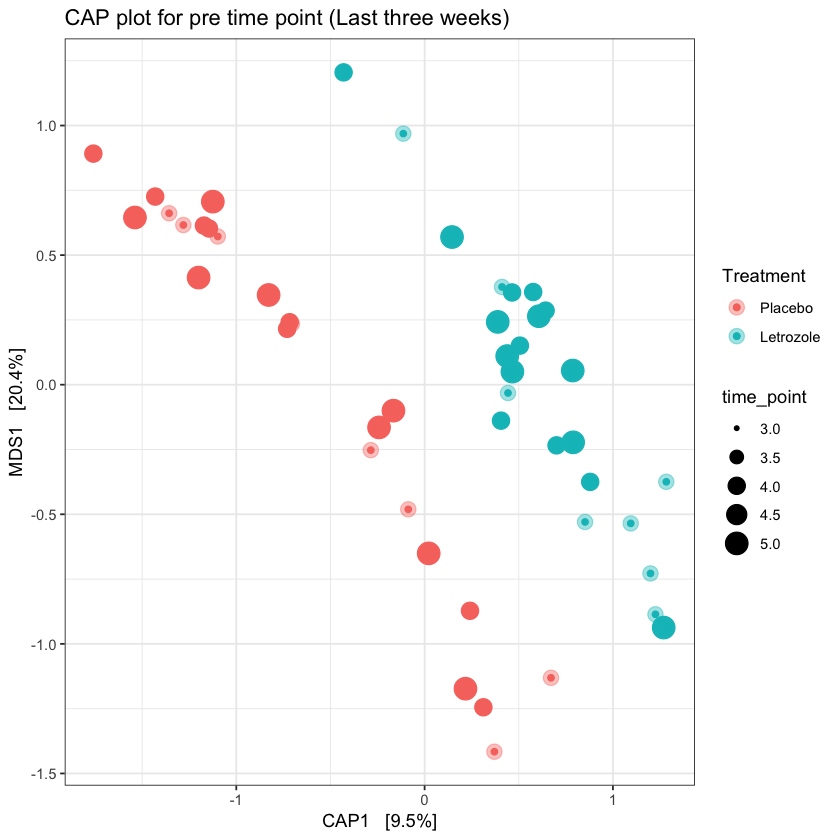

[1] "permuational analysis on constrained axes used in ordination for Pre (last 3 weeks)"


Df SumOfSqs  F        Pr(>F)
Model     1 0.7227431 4.852924 0.001 
Residual 46 6.8507523       NA    NA

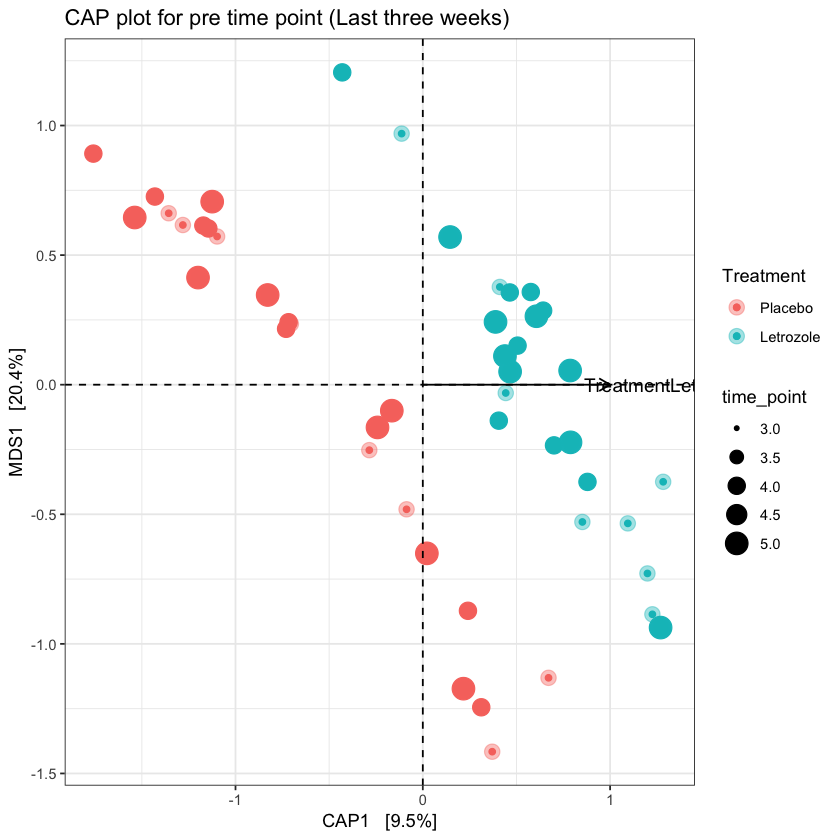

Warning message:
“Ignoring unknown aesthetics: label”

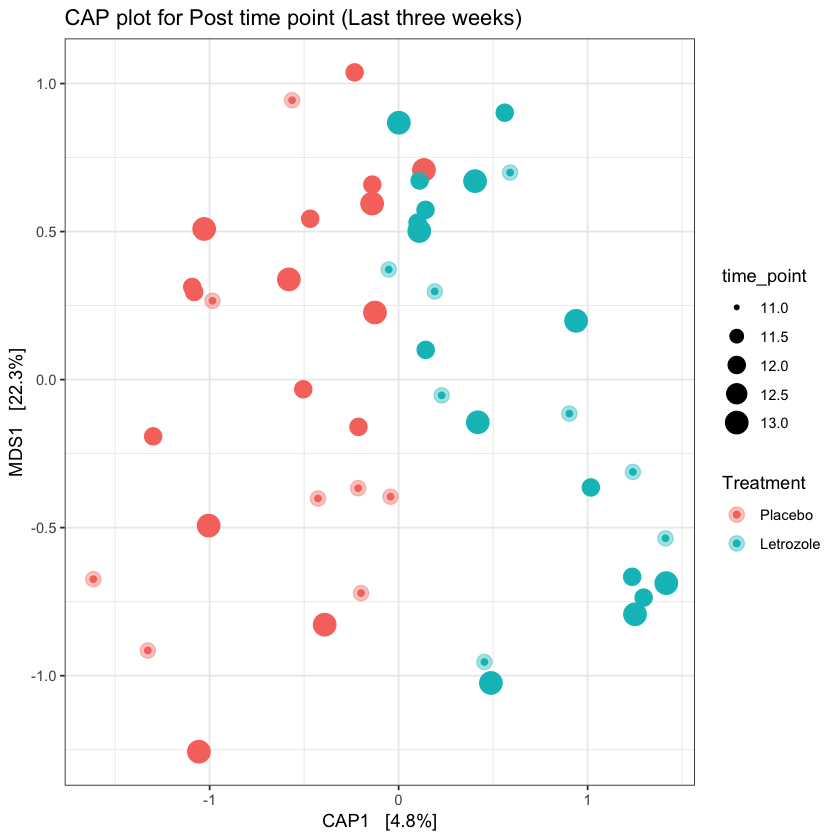

[1] "permuational analysis on constrained axes used in ordination for Post (last 3 weeks)"


Df SumOfSqs  F       Pr(>F)
Model     1 0.3261493 2.33169 0.007 
Residual 46 6.4343312      NA    NA

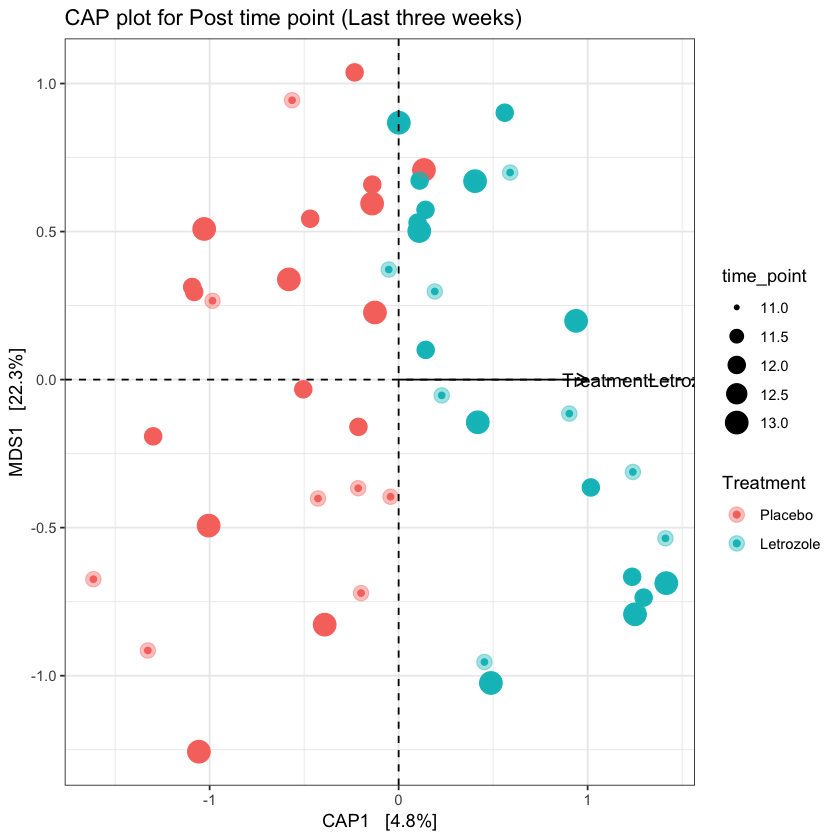

In [22]:
#--------------------------------------------------------------------------------------------------------------------#
#Title: CAP analysis (Constrained Analysis of Principal Coordinates)
#refer to page: https://joey711.github.io/phyloseq/plot_ordination-examples.html

#For pre time point (Last three weeks)
#Creating the ordination first
cap_ordination_pre_last3weeks_rarified <- ordinate( #The function we are using is ordinate
    physeq = phylo_pre_last3weeks_rarified, #Input is the phyloseq object of choice (ours is the pre last 3 weeks)
    method = "CAP", #Method we are doing is the CAP analysis
    distance = beta_div_distance1_braycurtis_pre_last3weeks_rarified, #This is the distance that we will use (Bray curtis)
    formula = ~ Treatment)

#CAP plot
cap_plot_pre_last3weeks_rarified <- plot_ordination(physeq = phylo_pre_last3weeks_rarified, 
  ordination = cap_ordination_pre_last3weeks_rarified, #The ordination object we are using 
    color = "Treatment", 
    axes = c(1,2)) + 
    geom_point(mapping = aes(size = time_point, )) +
    geom_point(aes(colour = Treatment, size=as.factor(time_point)), alpha = 0.4, size = 4) +   
    #geom_point(mapping = aes(shape = Pre_or_Post )) +
    #geom_point(colour = "white") + #This command makes the actual data points have a clear center
    #geom_point(mapping = aes(shape = Pre_or_Post )) +
    #scale_color_manual(values = c("#a65628", "red", "#ffae19", "#4daf4a", #This is for manually changing the colours
    #    "#1919ff", "darkorchid3", "magenta")) +
    ggtitle("CAP plot for pre time point (Last three weeks)") +
    theme_bw()
cap_plot_pre_last3weeks_rarified
# Now add the environmental variables as arrows
arrowmat <- vegan::scores(cap_ordination_pre_last3weeks_rarified, display = "bp")
# Add labels, make a data.frame
arrowdf <- data.frame(labels = rownames(arrowmat), arrowmat)
# Define the arrow aesthetic mapping
arrow_map <- aes(xend = CAP1, 
    yend = MDS1, 
    x = 0, 
    y = 0, 
    shape = NULL, 
    color = NULL, 
    label = labels)
label_map <- aes(x = 1.3 * CAP1, 
    y = 1.3 * MDS1, 
    shape = NULL, 
    color = NULL, 
    label = labels)
arrowhead = arrow(length = unit(0.02, "npc"))

#Update the new graphic
cap_plot_pre_last3weeks_rarified_with_env_arrows <- cap_plot_pre_last3weeks_rarified + 
  geom_segment(
    mapping = arrow_map, 
    size = .5, 
    data = arrowdf, 
    color = "black", 
    arrow = arrowhead) + 
    geom_text(
    mapping = label_map, 
    size = 4,  
    data = arrowdf, 
    show.legend = FALSE)+ 
    geom_hline(yintercept=0,linetype=2) + 
    geom_vline(xintercept=0,linetype=2) +
    theme_bw()

cap_plot_pre_last3weeks_rarified_with_env_arrows

# This is a permuational analysis on constrained axes used in ordination
print("permuational analysis on constrained axes used in ordination for Pre (last 3 weeks)")
anova(cap_ordination_pre_last3weeks_rarified)

#--------------------------------------------------------------------------------------------------------------------#

#For Post time point (Last three weeks)
#Creating the ordination first
cap_ordination_post_last3weeks_rarified <- ordinate( #The function we are using is ordinate
    physeq = phylo_post_last3weeks_rarified, #Input is the phyloseq object of choice (ours is the Post last 3 weeks)
    method = "CAP", #Method we are doing is the CAP analysis
    distance = beta_div_distance1_braycurtis_post_last3weeks_rarified, #This is the distance that we will use (Bray curtis)
    formula = ~Treatment)

# CAP plot
cap_plot_post_last3weeks_rarified <- plot_ordination(physeq = phylo_post_last3weeks_rarified, 
  ordination = cap_ordination_post_last3weeks_rarified, #The ordination object we are using 
    color = "Treatment", 
    axes = c(1,2)) + 
    geom_point(mapping = aes(size = time_point, )) +
    geom_point(aes(colour = Treatment, size=as.factor(time_point)), alpha = 0.4, size = 4) +   
    #geom_point(mapping = aes(shape = Pre_or_Post )) +
    #geom_point(colour = "white") + #This command makes the actual data points have a clear center
    #geom_point(mapping = aes(shape = Pre_or_Post )) +
    #scale_color_manual(values = c("#a65628", "red", "#ffae19", "#4daf4a", #This is for manually changing the colours
    #    "#1919ff", "darkorchid3", "magenta")) +
    ggtitle("CAP plot for Post time point (Last three weeks)") +
    theme_bw()
cap_plot_post_last3weeks_rarified
# Now add the environmental variables as arrows
arrowmat <- vegan::scores(cap_ordination_post_last3weeks_rarified, display = "bp")
# Add labels, make a data.frame
arrowdf <- data.frame(labels = rownames(arrowmat), arrowmat)
# Define the arrow aesthetic mapping
arrow_map <- aes(xend = CAP1, 
    yend = MDS1, 
    x = 0, 
    y = 0, 
    shape = NULL, 
    color = NULL, 
    label = labels)
label_map <- aes(x = 1.3 * CAP1, 
    y = 1.3 * MDS1, 
    shape = NULL, 
    color = NULL, 
    label = labels)
arrowhead = arrow(length = unit(0.02, "npc"))

#Update the new graphic
cap_plot_post_last3weeks_rarified_with_env_arrows <- cap_plot_post_last3weeks_rarified + 
  geom_segment(
    mapping = arrow_map, 
    size = .5, 
    data = arrowdf, 
    color = "black", 
    arrow = arrowhead) + 
    geom_text(
    mapping = label_map, 
    size = 4,  
    data = arrowdf, 
    show.legend = FALSE)+ 
    geom_hline(yintercept=0,linetype=2) + 
    geom_vline(xintercept=0,linetype=2) +
    theme_bw()

cap_plot_post_last3weeks_rarified_with_env_arrows

# This is a permuational analysis on constrained axes usined in ordination
print("permuational analysis on constrained axes used in ordination for Post (last 3 weeks)")
anova(cap_ordination_post_last3weeks_rarified)

#--------------------------------------------------------------------------------------------------------------------#

#Functions:
    
#ordinate() used for making the ordination
#plot_ordination() used for actually plotting them



Warning message:
“Ignoring unknown aesthetics: label”

[1] "permuational analysis on constrained axes used in ordination for Pre (last 5 weeks)"


Df SumOfSqs  F        Pr(>F)
Model     1  1.006497 6.222416 0.001 
Residual 78 12.616762       NA    NA

Warning message:
“Ignoring unknown aesthetics: label”

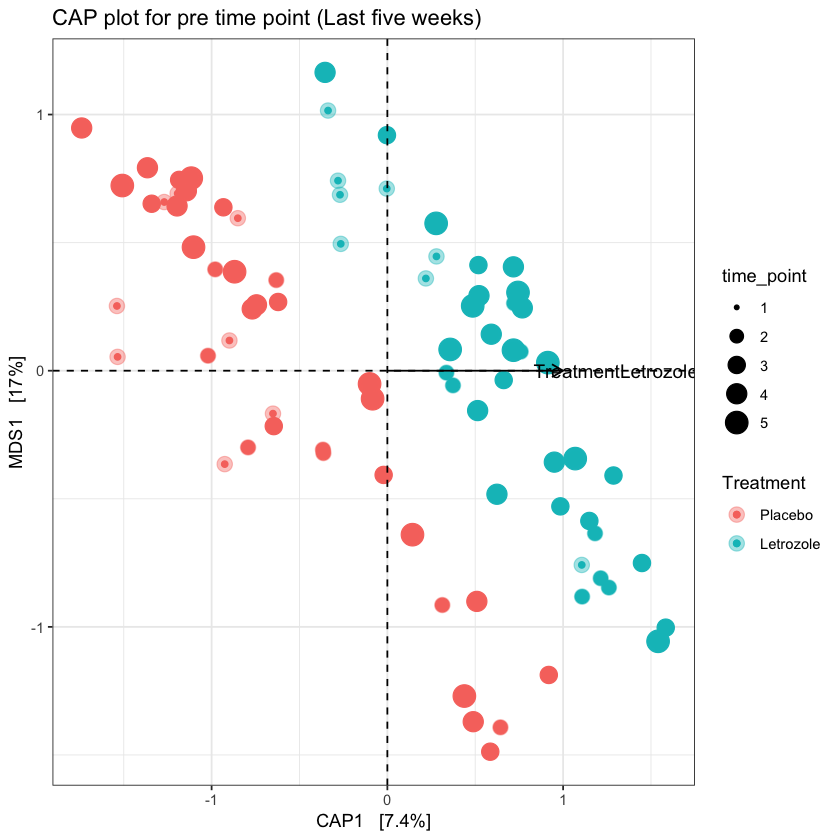

[1] "permuational analysis on constrained axes used in ordination for Post (last 5 weeks)"


Df SumOfSqs   F       Pr(>F)
Model     1  0.5647785 4.05061 0.002 
Residual 78 10.8755781      NA    NA

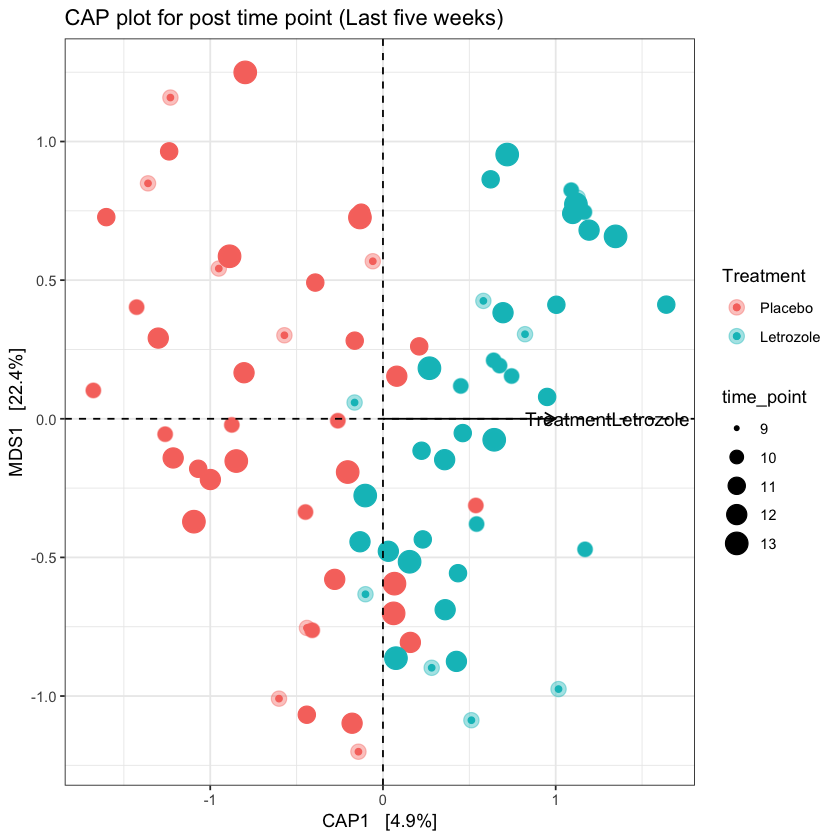

In [23]:
#--------------------------------------------------------------------------------------------------------------------#

#For pre time point (Last five weeks)
#Creating the ordination first
cap_ordination_pre_last5weeks_rarified <- ordinate( #The function we are using is ordinate
    physeq = phylo_pre_last5weeks_rarified, #Input is the phyloseq object of choice (ours is the pre last 3 weeks)
    method = "CAP", #Method we are doing is the CAP analysis
    distance = beta_div_distance1_braycurtis_pre_last5weeks_rarified, #This is the distance that we will use (Bray curtis)
    formula = ~Treatment)

#CAP plot
cap_plot_pre_last5weeks_rarified <- plot_ordination(physeq = phylo_pre_last5weeks_rarified, 
  ordination = cap_ordination_pre_last5weeks_rarified, #The ordination object we are using 
    color = "Treatment", 
    axes = c(1,2)) + 
    geom_point(mapping = aes(size = time_point, )) +
    geom_point(aes(colour = Treatment, size=as.factor(time_point)), alpha = 0.4, size = 4) +   
    #geom_point(mapping = aes(shape = Pre_or_Post )) +
    #geom_point(colour = "white") + #This command makes the actual data points have a clear center
    #geom_point(mapping = aes(shape = Pre_or_Post )) +
    #scale_color_manual(values = c("#a65628", "red", "#ffae19", "#4daf4a", #This is for manually changing the colours
    #    "#1919ff", "darkorchid3", "magenta")) +
    ggtitle("CAP plot for pre time point (Last five weeks)") +
    theme_bw()

# Now add the environmental variables as arrows
arrowmat <- vegan::scores(cap_ordination_pre_last5weeks_rarified, display = "bp")
# Add labels, make a data.frame
arrowdf <- data.frame(labels = rownames(arrowmat), arrowmat)
# Define the arrow aesthetic mapping
arrow_map <- aes(xend = CAP1, 
    yend = MDS1, 
    x = 0, 
    y = 0, 
    shape = NULL, 
    color = NULL, 
    label = labels)
label_map <- aes(x = 1.3 * CAP1, 
    y = 1.3 * MDS1, 
    shape = NULL, 
    color = NULL, 
    label = labels)
arrowhead = arrow(length = unit(0.02, "npc"))

# Make a new graphic
cap_plot_pre_last5weeks_rarified_with_env_arrows <- cap_plot_pre_last5weeks_rarified + 
  geom_segment(
    mapping = arrow_map, 
    size = .5, 
    data = arrowdf, 
    color = "black", 
    arrow = arrowhead) + 
    geom_text(
    mapping = label_map, 
    size = 4,  
    data = arrowdf, 
    show.legend = FALSE)+ 
    geom_hline(yintercept=0,linetype=2) + 
    geom_vline(xintercept=0,linetype=2) +
    theme_bw()

cap_plot_pre_last5weeks_rarified_with_env_arrows

# This is a permuational analysis on constrained axes used in ordination
print("permuational analysis on constrained axes used in ordination for Pre (last 5 weeks)")
anova(cap_ordination_pre_last5weeks_rarified)

#--------------------------------------------------------------------------------------------------------------------#

#For Post time point (Last 5 weeks)
#Creating the ordination first
cap_ordination_post_last5weeks_rarified <- ordinate( #The function we are using is ordinate
    physeq = phylo_post_last5weeks_rarified, #Input is the phyloseq object of choice (ours is the Post last 3 weeks)
    method = "CAP", #Method we are doing is the CAP analysis
    distance = beta_div_distance1_braycurtis_post_last5weeks_rarified, #This is the distance that we will use (Bray curtis)
    formula = ~Treatment)

# CAP plot
cap_plot_post_last5weeks_rarified <- plot_ordination(physeq = phylo_post_last5weeks_rarified, 
  ordination = cap_ordination_post_last5weeks_rarified, #The ordination object we are using 
    color = "Treatment", 
    axes = c(1,2)) + 
    geom_point(mapping = aes(size = time_point, )) +
    geom_point(aes(colour = Treatment, size=as.factor(time_point)), alpha = 0.4, size = 4) +   
    #geom_point(mapping = aes(shape = Pre_or_Post )) +
    #geom_point(colour = "white") + #This command makes the actual data points have a clear center
    #geom_point(mapping = aes(shape = Pre_or_Post )) +
    #scale_color_manual(values = c("#a65628", "red", "#ffae19", "#4daf4a", #This is for manually changing the colours
    #    "#1919ff", "darkorchid3", "magenta")) +
    ggtitle("CAP plot for post time point (Last five weeks)") +
    theme_bw()

# Now add the environmental variables as arrows
arrowmat <- vegan::scores(cap_ordination_post_last5weeks_rarified, display = "bp")
# Add labels, make a data.frame
arrowdf <- data.frame(labels = rownames(arrowmat), arrowmat)
# Define the arrow aesthetic mapping
arrow_map <- aes(xend = CAP1, 
    yend = MDS1, 
    x = 0, 
    y = 0, 
    shape = NULL, 
    color = NULL, 
    label = labels)
label_map <- aes(x = 1.3 * CAP1, 
    y = 1.3 * MDS1, 
    shape = NULL, 
    color = NULL, 
    label = labels)
arrowhead = arrow(length = unit(0.02, "npc"))

# Make a new graphic
cap_plot_post_last5weeks_rarified_with_env_arrows <- cap_plot_post_last5weeks_rarified + 
  geom_segment(
    mapping = arrow_map, 
    size = .5, 
    data = arrowdf, 
    color = "black", 
    arrow = arrowhead) + 
    geom_text(
    mapping = label_map, 
    size = 4,  
    data = arrowdf, 
    show.legend = FALSE)+ 
    geom_hline(yintercept=0,linetype=2) + 
    geom_vline(xintercept=0,linetype=2) +
    theme_bw()

cap_plot_post_last5weeks_rarified_with_env_arrows

# This is a permuational analysis on constrained axes usined in ordination
print("permuational analysis on constrained axes used in ordination for Post (last 5 weeks)")
anova(cap_ordination_post_last5weeks_rarified)
#--------------------------------------------------------------------------------------------------------------------#
#Functions:
    
#ordinate() used for making the ordination
#plot_ordination() used for actually plotting them



Warning message:
“Ignoring unknown aesthetics: label”

[1] "permuational analysis on constrained axes used in ordination for Pre (all weeks 0-5)"


Df SumOfSqs   F        Pr(>F)
Model     1  0.9080827 4.915566 0.001 
Residual 94 17.3651976       NA    NA

Warning message:
“Ignoring unknown aesthetics: label”

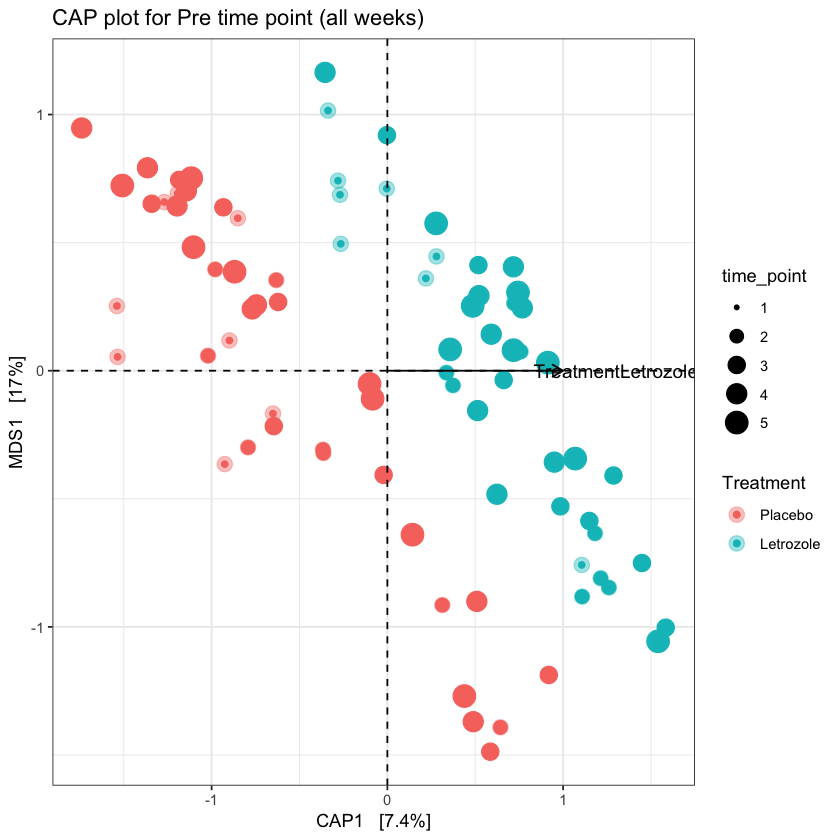

[1] "permuational analysis on constrained axes used in ordination for Post (all weeks 6-13)"


Df  SumOfSqs   F        Pr(>F)
Model      1  0.7666037 5.544564 0.001 
Residual 126 17.4210405       NA    NA

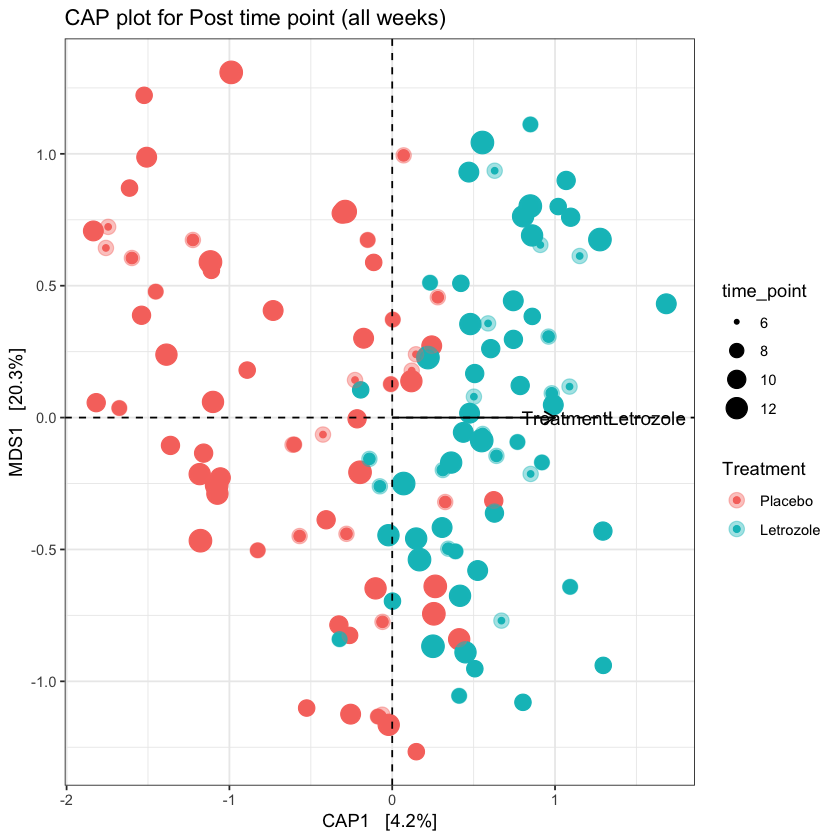

In [24]:
#--------------------------------------------------------------------------------------------------------------------#

#For pre time point (all weeks 0-5)
#Creating the ordination first
cap_ordination_pre_weeks012345_rarified <- ordinate( #The function we are using is ordinate
    physeq = phylo_pre_weeks012345_rarified, #Input is the phyloseq object of choice (ours is the pre last 3 weeks)
    method = "CAP", #Method we are doing is the CAP analysis
    distance = beta_div_distance1_braycurtis_pre_weeks012345_rarified, #This is the distance that we will use (Bray curtis)
    formula = ~ Treatment)

#CAP plot
cap_plot_pre_weeks012345_rarified <- plot_ordination(physeq = phylo_pre_weeks012345_rarified, 
  ordination = cap_ordination_pre_last5weeks_rarified, #The ordination object we are using 
    color = "Treatment", 
    axes = c(1,2)) + 
    geom_point(mapping = aes(size = time_point, )) +
    geom_point(aes(colour = Treatment, size=as.factor(time_point)), alpha = 0.4, size = 4) +   
    #geom_point(mapping = aes(shape = Pre_or_Post )) +
    #geom_point(colour = "white") + #This command makes the actual data points have a clear center
    #geom_point(mapping = aes(shape = Pre_or_Post )) +
    #scale_color_manual(values = c("#a65628", "red", "#ffae19", "#4daf4a", #This is for manually changing the colours
    #    "#1919ff", "darkorchid3", "magenta")) +
    ggtitle("CAP plot for Pre time point (all weeks)") +
    theme_bw()

# Now add the environmental variables as arrows
arrowmat <- vegan::scores(cap_ordination_pre_weeks012345_rarified, display = "bp")
# Add labels, make a data.frame
arrowdf <- data.frame(labels = rownames(arrowmat), arrowmat)
# Define the arrow aesthetic mapping
arrow_map <- aes(xend = CAP1, 
    yend = MDS1, 
    x = 0, 
    y = 0, 
    shape = NULL, 
    color = NULL, 
    label = labels)
label_map <- aes(x = 1.3 * CAP1, 
    y = 1.3 * MDS1, 
    shape = NULL, 
    color = NULL, 
    label = labels)
arrowhead = arrow(length = unit(0.02, "npc"))

# Make a new graphic
cap_plot_pre_weeks012345_rarified_with_env_arrows <- cap_plot_pre_weeks012345_rarified + 
  geom_segment(
    mapping = arrow_map, 
    size = .5, 
    data = arrowdf, 
    color = "black", 
    arrow = arrowhead) + 
    geom_text(
    mapping = label_map, 
    size = 4,  
    data = arrowdf, 
    show.legend = FALSE)+ 
    geom_hline(yintercept=0,linetype=2) + 
    geom_vline(xintercept=0,linetype=2) +
    theme_bw()

cap_plot_pre_weeks012345_rarified_with_env_arrows

# This is a permuational analysis on constrained axes used in ordination
print("permuational analysis on constrained axes used in ordination for Pre (all weeks 0-5)")
anova(cap_ordination_pre_weeks012345_rarified)

#--------------------------------------------------------------------------------------------------------------------#

#For Post time point (all weeks 6-13)
#Creating the ordination first
cap_ordination_post_weeks678910111213_rarified <- ordinate( #The function we are using is ordinate
    physeq = phylo_post_weeks678910111213_rarified, #Input is the phyloseq object of choice (ours is the Post last 3 weeks)
    method = "CAP", #Method we are doing is the CAP analysis
    distance = beta_div_distance1_braycurtis_post_weeks678910111213_rarified, #This is the distance that we will use (Bray curtis)
    formula = ~ Treatment)

# CAP plot
cap_plot_post_weeks678910111213_rarified <- plot_ordination(physeq = phylo_post_weeks678910111213_rarified, 
  ordination = cap_ordination_post_weeks678910111213_rarified, #The ordination object we are using 
    color = "Treatment", 
    axes = c(1,2)) + 
    geom_point(mapping = aes(size = time_point, )) +
    geom_point(aes(colour = Treatment, size=as.factor(time_point)), alpha = 0.4, size = 4) +   
    #geom_point(mapping = aes(shape = Pre_or_Post )) +
    #geom_point(colour = "white") + #This command makes the actual data points have a clear center
    #geom_point(mapping = aes(shape = Pre_or_Post )) +
    #scale_color_manual(values = c("#a65628", "red", "#ffae19", "#4daf4a", #This is for manually changing the colours
    #    "#1919ff", "darkorchid3", "magenta")) +
    ggtitle("CAP plot for Post time point (all weeks)") +
    theme_bw()

# Now add the environmental variables as arrows
arrowmat <- vegan::scores(cap_ordination_post_weeks678910111213_rarified, display = "bp")
# Add labels, make a data.frame
arrowdf <- data.frame(labels = rownames(arrowmat), arrowmat)
# Define the arrow aesthetic mapping
arrow_map <- aes(xend = CAP1, 
    yend = MDS1, 
    x = 0, 
    y = 0, 
    shape = NULL, 
    color = NULL, 
    label = labels)
label_map <- aes(x = 1.3 * CAP1, 
    y = 1.3 * MDS1, 
    shape = NULL, 
    color = NULL, 
    label = labels)
arrowhead = arrow(length = unit(0.02, "npc"))

# Make a new graphic
cap_plot_post_weeks678910111213_rarified_with_env_arrows <- cap_plot_post_weeks678910111213_rarified + 
  geom_segment(
    mapping = arrow_map, 
    size = .5, 
    data = arrowdf, 
    color = "black", 
    arrow = arrowhead) + 
    geom_text(
    mapping = label_map, 
    size = 4,  
    data = arrowdf, 
    show.legend = FALSE)+ 
    geom_hline(yintercept=0,linetype=2) + 
    geom_vline(xintercept=0,linetype=2) +
    theme_bw()

cap_plot_post_weeks678910111213_rarified_with_env_arrows

# This is a permuational analysis on constrained axes usined in ordination
print("permuational analysis on constrained axes used in ordination for Post (all weeks 6-13)")
anova(cap_ordination_post_weeks678910111213_rarified)
#--------------------------------------------------------------------------------------------------------------------#
#Functions:
    
#ordinate() used for making the ordination
#plot_ordination() used for actually plotting them



Warning message:
“Ignoring unknown aesthetics: label”

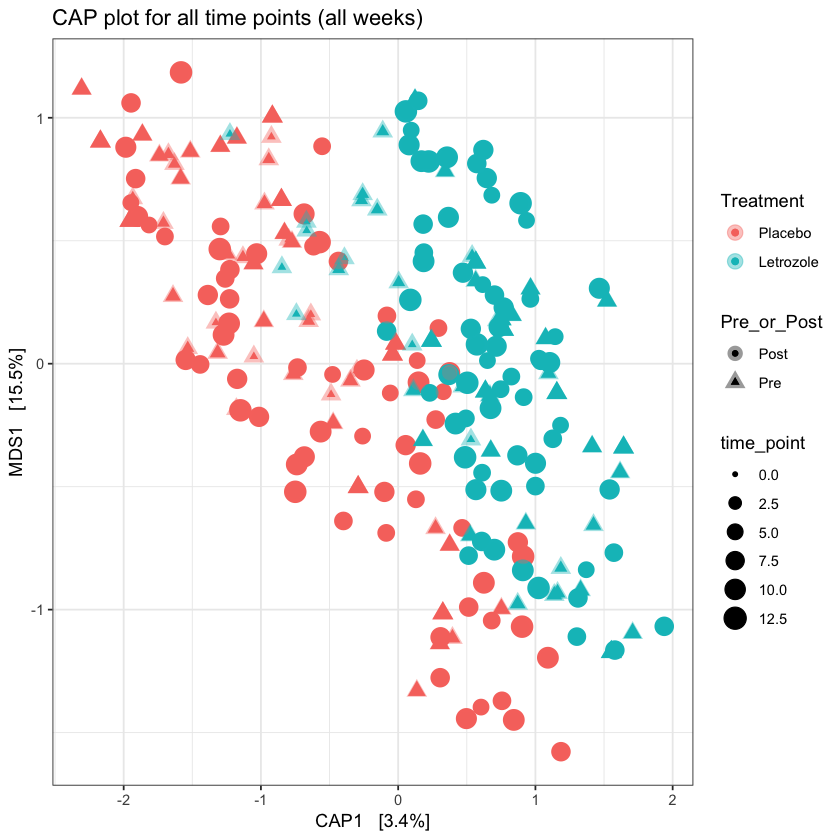

[1] "permuational analysis on constrained axes used in ordination for weeks"


Df  SumOfSqs  F      Pr(>F)
Model      1  1.344249 7.7084 0.001 
Residual 222 38.714027     NA    NA

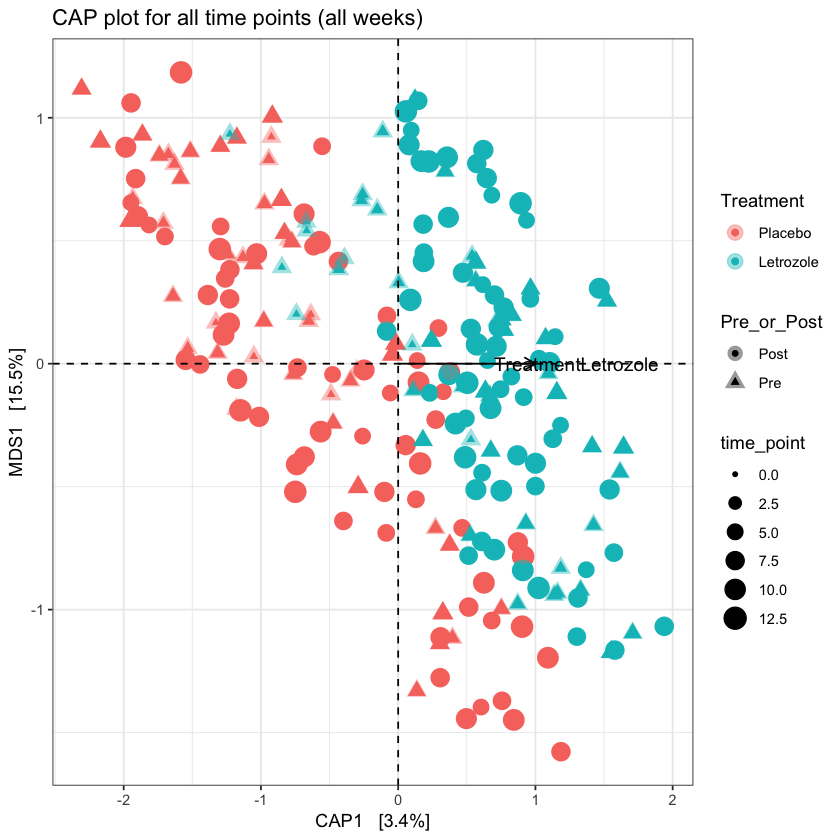

In [25]:
#--------------------------------------------------------------------------------------------------------------------#

#For all time points (all weeks 0-13)
#Creating the ordination first
cap_ordination_placebo_and_letrozole_allweeks_rarified <- ordinate( #The function we are using is ordinate
    physeq = phylo_placebo_and_letrozole_allweeks_rarified, #Input is the phyloseq object of choice (ours is the pre last 3 weeks)
    method = "CAP", #Method we are doing is the CAP analysis
    distance = beta_div_distance1_braycurtis_placebo_and_letrozole_allweeks_rarified, #This is the distance that we will use (Bray curtis)
    formula = ~Treatment)

#CAP plot
cap_plot_placebo_and_letrozole_allweeks_rarified <- plot_ordination(physeq = phylo_placebo_and_letrozole_allweeks_rarified, 
  ordination = cap_ordination_placebo_and_letrozole_allweeks_rarified, #The ordination object we are using 
    color = "Treatment", 
    shape = "Pre_or_Post"    ,                                                        
    axes = c(1,2)) + 
    geom_point(mapping = aes(size = time_point, )) +
    geom_point(aes(colour = Treatment, size=as.factor(time_point)), alpha = 0.4, size = 4) +   
    #geom_point(mapping = aes(shape = Pre_or_Post )) +
    #geom_point(colour = "white") + #This command makes the actual data points have a clear center
    #geom_point(mapping = aes(shape = Pre_or_Post )) +
    #scale_color_manual(values = c("#a65628", "red", "#ffae19", "#4daf4a", #This is for manually changing the colours
    #    "#1919ff", "darkorchid3", "magenta")) +
    ggtitle("CAP plot for all time points (all weeks)")+
    theme_bw()
cap_plot_placebo_and_letrozole_allweeks_rarified
# Now add the environmental variables as arrows
arrowmat <- vegan::scores(cap_ordination_placebo_and_letrozole_allweeks_rarified, display = "bp")
# Add labels, make a data.frame
arrowdf <- data.frame(labels = rownames(arrowmat), arrowmat)
# Define the arrow aesthetic mapping
arrow_map <- aes(xend = CAP1, 
    yend = MDS1, 
    x = 0, 
    y = 0, 
    shape = NULL, 
    color = NULL, 
    label = labels)
label_map <- aes(x = 1.3 * CAP1, 
    y = 1.3 * MDS1, 
    shape = NULL, 
    color = NULL, 
    label = labels)
arrowhead = arrow(length = unit(0.02, "npc"))

# Make a new graphic
cap_plot_placebo_and_letrozole_allweeks_rarified_with_env_arrows <- cap_plot_placebo_and_letrozole_allweeks_rarified + 
  geom_segment(
    mapping = arrow_map, 
    size = .5, 
    data = arrowdf, 
    color = "black", 
    arrow = arrowhead) + 
    geom_text(
    mapping = label_map, 
    size = 4,  
    data = arrowdf, 
    show.legend = FALSE)+ 
    geom_hline(yintercept=0,linetype=2) + 
    geom_vline(xintercept=0,linetype=2) +
    theme_bw()

cap_plot_placebo_and_letrozole_allweeks_rarified_with_env_arrows

# This is a permuational analysis on constrained axes used in ordination
print("permuational analysis on constrained axes used in ordination for weeks")
anova(cap_ordination_placebo_and_letrozole_allweeks_rarified)

#--------------------------------------------------------------------------------------------------------------------#


Warning message:
“Ignoring unknown aesthetics: label”

[1] "permuational analysis on constrained axes used in ordination for weeks"


Df  SumOfSqs  F        Pr(>F)
Model      1  1.400385 8.763478 0.001 
Residual 206 32.918368       NA    NA

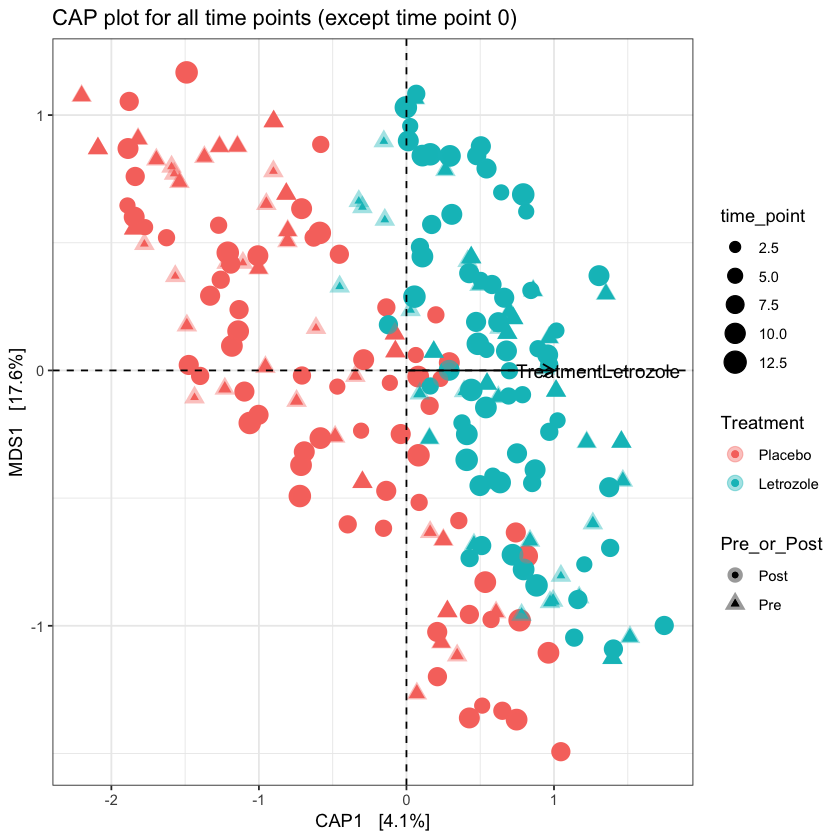

In [26]:
#--------------------------------------------------------------------------------------------------------------------#

#For all time points except time 0 (all weeks 1-13)
#Creating the ordination first
cap_ordination_placebo_and_letrozole_allweeks_except0_rarified <- ordinate( #The function we are using is ordinate
    physeq = phylo_placebo_and_letrozole_allweeks_except0_rarified, #Input is the phyloseq object of choice
    method = "CAP", #Method we are doing is the CAP analysis
    distance = beta_div_distance1_braycurtis_placebo_and_letrozole_allweeks_except0_rarified, #This is the distance that we will use (Bray curtis)
    formula = ~Treatment)

#CAP plot
cap_plot_placebo_and_letrozole_allweeks_except0_rarified <- plot_ordination(physeq = phylo_placebo_and_letrozole_allweeks_except0_rarified, 
  ordination = cap_ordination_placebo_and_letrozole_allweeks_except0_rarified, #The ordination object we are using 
    color = "Treatment", 
    shape = "Pre_or_Post"    ,                                                        
    axes = c(1,2)) + 
    geom_point(mapping = aes(size = time_point, )) +
    geom_point(aes(colour = Treatment, size=as.factor(time_point)), alpha = 0.4, size = 4) +   
    ggtitle("CAP plot for all time points (except time point 0)")+
    theme_bw()

# Now add the environmental variables as arrows
arrowmat <- vegan::scores(cap_ordination_placebo_and_letrozole_allweeks_rarified, display = "bp")
# Add labels, make a data.frame
arrowdf <- data.frame(labels = rownames(arrowmat), arrowmat)
# Define the arrow aesthetic mapping
arrow_map <- aes(xend = CAP1, 
    yend = MDS1, 
    x = 0, 
    y = 0, 
    shape = NULL, 
    color = NULL, 
    label = labels)
label_map <- aes(x = 1.3 * CAP1, 
    y = 1.3 * MDS1, 
    shape = NULL, 
    color = NULL, 
    label = labels)
arrowhead = arrow(length = unit(0.02, "npc"))

# Make a new graphic
cap_plot_placebo_and_letrozole_allweeks_except0_rarified_with_env_arrows <- cap_plot_placebo_and_letrozole_allweeks_except0_rarified + 
  geom_segment(
    mapping = arrow_map, 
    size = .5, 
    data = arrowdf, 
    color = "black", 
    arrow = arrowhead) + 
    geom_text(
    mapping = label_map, 
    size = 4,  
    data = arrowdf, 
    show.legend = FALSE)+ 
    geom_hline(yintercept=0,linetype=2) + 
    geom_vline(xintercept=0,linetype=2) +
    theme_bw()

cap_plot_placebo_and_letrozole_allweeks_except0_rarified_with_env_arrows

# This is a permuational analysis on constrained axes used in ordination
print("permuational analysis on constrained axes used in ordination for weeks")
anova(cap_ordination_placebo_and_letrozole_allweeks_except0_rarified)

#--------------------------------------------------------------------------------------------------------------------#


### Taxanomic analysis through the use of bar plots